In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd

pd. set_option("display.max_columns", None)
np.set_printoptions(linewidth=150)

# Preparing the dataset

password = ".tie5Roanl"

    H.char -> Hold time
    DD.char1.char2 -> Time from when char1 was pressed to when char2 was pressed
    UD.char1.char2 -> Time from when char1 was released to when char2 was pressed

In [2]:
original_data = pd.read_csv("DSL-StrongPasswordData.csv")

In [3]:
original_data

,subject,sessionIndex,rep,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,UD.i.e,H.e,DD.e.five,UD.e.five,H.five,DD.five.Shift.r,UD.five.Shift.r,H.Shift.r,DD.Shift.r.o,UD.Shift.r.o,H.o,DD.o.a,UD.o.a,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
0,s002,1,1,0.1491,0.3979,0.2488,0.1069,0.1674,0.0605,0.1169,0.2212,0.1043,0.1417,1.1885,1.0468,0.1146,1.6055,1.4909,0.1067,0.7590,0.6523,0.1016,0.2136,0.1120,0.1349,0.1484,0.0135,0.0932,0.3515,0.2583,0.1338,0.3509,0.2171,0.0742
1,s002,1,2,0.1111,0.3451,0.2340,0.0694,0.1283,0.0589,0.0908,0.1357,0.0449,0.0829,1.1970,1.1141,0.0689,0.7822,0.7133,0.1570,0.7877,0.6307,0.1066,0.1684,0.0618,0.1412,0.2558,0.1146,0.1146,0.2642,0.1496,0.0839,0.2756,0.1917,0.0747
2,s002,1,3,0.1328,0.2072,0.0744,0.0731,0.1291,0.0560,0.0821,0.1542,0.0721,0.0808,1.0408,0.9600,0.0892,0.6203,0.5311,0.1454,0.7195,0.5741,0.1365,0.2931,0.1566,0.1621,0.2332,0.0711,0.1172,0.2705,0.1533,0.1085,0.2847,0.1762,0.0945
3,s002,1,4,0.1291,0.2515,0.1224,0.1059,0.2495,0.1436,0.1040,0.2038,0.0998,0.0900,1.0556,0.9656,0.0913,1.2564,1.1651,0.1454,0.7550,0.6096,0.0956,0.1530,0.0574,0.1457,0.1629,0.0172,0.0866,0.2341,0.1475,0.0845,0.3232,0.2387,0.0813
4,s002,1,5,0.1249,0.2317,0.1068,0.0895,0.1676,0.0781,0.0903,0.1589,0.0686,0.0805,0.8629,0.7824,0.0742,0.8955,0.8213,0.1243,0.7632,0.6389,0.0430,0.1975,0.1545,0.1312,0.1582,0.0270,0.0884,0.2517,0.1633,0.0903,0.2517,0.1614,0.0818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20395,s057,8,46,0.0884,0.0685,-0.0199,0.1095,0.1290,0.0195,0.0945,0.0757,-0.0188,0.1328,0.0826,-0.0502,0.1000,0.2398,0.1398,0.0863,0.2148,0.1285,0.0944,0.2066,0.1122,0.1219,0.1383,0.0164,0.0820,0.1329,0.0509,0.1005,0.2054,0.1049,0.1047
20396,s057,8,47,0.0655,0.0630,-0.0025,0.0910,0.1148,0.0238,0.0916,0.0636,-0.0280,0.1256,0.0852,-0.0404,0.0987,0.2441,0.1454,0.0892,0.1209,0.0317,0.0776,0.0977,0.0201,0.1008,0.0512,-0.0496,0.1037,0.0868,-0.0169,0.1445,0.2206,0.0761,0.1198
20397,s057,8,48,0.0939,0.1189,0.0250,0.1008,0.1122,0.0114,0.0721,0.0462,-0.0259,0.0903,0.2045,0.1142,0.0733,0.2190,0.1457,0.0742,0.1700,0.0958,0.0599,0.1104,0.0505,0.0913,0.1169,0.0256,0.0689,0.1311,0.0622,0.1034,0.2017,0.0983,0.0905
20398,s057,8,49,0.0923,0.1294,0.0371,0.0913,0.0990,0.0077,0.0992,0.0897,-0.0095,0.1016,0.0570,-0.0446,0.0820,0.2881,0.2061,0.0729,0.1602,0.0873,0.0728,0.1111,0.0383,0.0882,0.0821,-0.0061,0.0576,0.0697,0.0121,0.0979,0.1917,0.0938,0.0931


In [4]:
data = original_data.drop(["sessionIndex","rep"],axis=1)

data

,subject,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,UD.i.e,H.e,DD.e.five,UD.e.five,H.five,DD.five.Shift.r,UD.five.Shift.r,H.Shift.r,DD.Shift.r.o,UD.Shift.r.o,H.o,DD.o.a,UD.o.a,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
0,s002,0.1491,0.3979,0.2488,0.1069,0.1674,0.0605,0.1169,0.2212,0.1043,0.1417,1.1885,1.0468,0.1146,1.6055,1.4909,0.1067,0.7590,0.6523,0.1016,0.2136,0.1120,0.1349,0.1484,0.0135,0.0932,0.3515,0.2583,0.1338,0.3509,0.2171,0.0742
1,s002,0.1111,0.3451,0.2340,0.0694,0.1283,0.0589,0.0908,0.1357,0.0449,0.0829,1.1970,1.1141,0.0689,0.7822,0.7133,0.1570,0.7877,0.6307,0.1066,0.1684,0.0618,0.1412,0.2558,0.1146,0.1146,0.2642,0.1496,0.0839,0.2756,0.1917,0.0747
2,s002,0.1328,0.2072,0.0744,0.0731,0.1291,0.0560,0.0821,0.1542,0.0721,0.0808,1.0408,0.9600,0.0892,0.6203,0.5311,0.1454,0.7195,0.5741,0.1365,0.2931,0.1566,0.1621,0.2332,0.0711,0.1172,0.2705,0.1533,0.1085,0.2847,0.1762,0.0945
3,s002,0.1291,0.2515,0.1224,0.1059,0.2495,0.1436,0.1040,0.2038,0.0998,0.0900,1.0556,0.9656,0.0913,1.2564,1.1651,0.1454,0.7550,0.6096,0.0956,0.1530,0.0574,0.1457,0.1629,0.0172,0.0866,0.2341,0.1475,0.0845,0.3232,0.2387,0.0813
4,s002,0.1249,0.2317,0.1068,0.0895,0.1676,0.0781,0.0903,0.1589,0.0686,0.0805,0.8629,0.7824,0.0742,0.8955,0.8213,0.1243,0.7632,0.6389,0.0430,0.1975,0.1545,0.1312,0.1582,0.0270,0.0884,0.2517,0.1633,0.0903,0.2517,0.1614,0.0818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20395,s057,0.0884,0.0685,-0.0199,0.1095,0.1290,0.0195,0.0945,0.0757,-0.0188,0.1328,0.0826,-0.0502,0.1000,0.2398,0.1398,0.0863,0.2148,0.1285,0.0944,0.2066,0.1122,0.1219,0.1383,0.0164,0.0820,0.1329,0.0509,0.1005,0.2054,0.1049,0.1047
20396,s057,0.0655,0.0630,-0.0025,0.0910,0.1148,0.0238,0.0916,0.0636,-0.0280,0.1256,0.0852,-0.0404,0.0987,0.2441,0.1454,0.0892,0.1209,0.0317,0.0776,0.0977,0.0201,0.1008,0.0512,-0.0496,0.1037,0.0868,-0.0169,0.1445,0.2206,0.0761,0.1198
20397,s057,0.0939,0.1189,0.0250,0.1008,0.1122,0.0114,0.0721,0.0462,-0.0259,0.0903,0.2045,0.1142,0.0733,0.2190,0.1457,0.0742,0.1700,0.0958,0.0599,0.1104,0.0505,0.0913,0.1169,0.0256,0.0689,0.1311,0.0622,0.1034,0.2017,0.0983,0.0905
20398,s057,0.0923,0.1294,0.0371,0.0913,0.0990,0.0077,0.0992,0.0897,-0.0095,0.1016,0.0570,-0.0446,0.0820,0.2881,0.2061,0.0729,0.1602,0.0873,0.0728,0.1111,0.0383,0.0882,0.0821,-0.0061,0.0576,0.0697,0.0121,0.0979,0.1917,0.0938,0.0931


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,1:],data["subject"],
                                                    stratify = data["subject"],
                                                    test_size=0.25)

y_train_dummy = pd.get_dummies(y_train)
y_test_dummy= pd.get_dummies(y_test)

In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

minmax = MinMaxScaler()
X_train_minmax = scaler.fit_transform(X_train)
X_test_minmax = scaler.transform(X_test)

In [7]:
model = tf.keras.Sequential([
    keras.layers.Input(shape=(31,)),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dense(256,activation="relu"),
    keras.layers.Dense(256,activation="relu"),
    keras.layers.Dense(51,activation="softmax")   
])

model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

model.fit(X_train_scaled,y_train_dummy,epochs=20,validation_data=(X_test_scaled,y_test_dummy),verbose=2)

Epoch 1/20
479/479 - 1s - loss: 1.2575 - accuracy: 0.6687 - val_loss: 0.7115 - val_accuracy: 0.8045
Epoch 2/20
479/479 - 1s - loss: 0.5235 - accuracy: 0.8481 - val_loss: 0.5497 - val_accuracy: 0.8420
Epoch 3/20
479/479 - 1s - loss: 0.3957 - accuracy: 0.8823 - val_loss: 0.4849 - val_accuracy: 0.8667
Epoch 4/20
479/479 - 1s - loss: 0.3099 - accuracy: 0.9061 - val_loss: 0.4309 - val_accuracy: 0.8749
Epoch 5/20
479/479 - 1s - loss: 0.2491 - accuracy: 0.9244 - val_loss: 0.4089 - val_accuracy: 0.8845
Epoch 6/20
479/479 - 1s - loss: 0.1974 - accuracy: 0.9384 - val_loss: 0.3775 - val_accuracy: 0.8963
Epoch 7/20
479/479 - 1s - loss: 0.1683 - accuracy: 0.9459 - val_loss: 0.3567 - val_accuracy: 0.9008
Epoch 8/20
479/479 - 1s - loss: 0.1318 - accuracy: 0.9565 - val_loss: 0.3682 - val_accuracy: 0.9018
Epoch 9/20
479/479 - 1s - loss: 0.1309 - accuracy: 0.9580 - val_loss: 0.3712 - val_accuracy: 0.9024
Epoch 10/20
479/479 - 1s - loss: 0.0934 - accuracy: 0.9691 - val_loss: 0.3530 - val_accuracy: 0.9090

# Results:

With 300 instances for the training set and 100 instances for the test set per each user, Neural Network that does multiclass classification gets a validation accuracy of **91%**

Lowering the number of instances reduces the results drastically.

In [8]:
y_train.unique()

array(['s021', 's007', 's011', 's020', 's022', 's033', 's039', 's042', 's053', 's010', 's016', 's054', 's040', 's052', 's043', 's057', 's034',
       's048', 's019', 's024', 's002', 's029', 's036', 's030', 's051', 's028', 's017', 's026', 's003', 's031', 's055', 's050', 's035', 's038',
       's046', 's004', 's041', 's044', 's049', 's008', 's012', 's056', 's047', 's025', 's013', 's018', 's032', 's037', 's027', 's005', 's015'],
      dtype=object)

In [9]:
X_train

,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,UD.i.e,H.e,DD.e.five,UD.e.five,H.five,DD.five.Shift.r,UD.five.Shift.r,H.Shift.r,DD.Shift.r.o,UD.Shift.r.o,H.o,DD.o.a,UD.o.a,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
6698,0.0969,0.1720,0.0751,0.0903,0.1315,0.0412,0.1053,0.1111,0.0058,0.0808,0.1734,0.0926,0.1148,0.3131,0.1983,0.1122,0.1975,0.0853,0.0890,0.1514,0.0624,0.0758,0.1582,0.0824,0.0845,0.2032,0.1187,0.0942,0.2962,0.2020,0.0932
1690,0.1370,0.2121,0.0751,0.0737,0.1173,0.0436,0.0744,0.1085,0.0341,0.0990,0.2254,0.1264,0.0726,0.3044,0.2318,0.0961,0.1458,0.0497,0.0855,0.1336,0.0481,0.0969,0.1255,0.0286,0.1191,0.1058,-0.0133,0.0948,0.2150,0.1202,0.0760
2968,0.0475,0.1485,0.1010,0.1064,0.1128,0.0064,0.0787,0.1204,0.0417,0.1273,0.1259,-0.0014,0.0909,0.2546,0.1637,0.1344,0.1463,0.0119,0.0945,0.1719,0.0774,0.1127,0.0824,-0.0303,0.1343,0.1375,0.0032,0.1143,0.1203,0.0060,0.1090
6170,0.1064,0.0857,-0.0207,0.1006,0.1452,0.0446,0.1415,0.0977,-0.0438,0.1085,0.3048,0.1963,0.0713,0.2883,0.2170,0.1014,0.1067,0.0053,0.0998,0.1186,0.0188,0.1307,0.0930,-0.0377,0.0996,0.0417,-0.0579,0.1239,0.1428,0.0189,0.1198
6860,0.0454,0.4942,0.4488,0.0478,0.2998,0.2520,0.0320,0.2848,0.2528,0.0884,1.0753,0.9869,0.0483,0.8902,0.8419,0.0446,0.4167,0.3721,0.0475,0.5450,0.4975,0.0858,0.2413,0.1555,0.0444,1.3540,1.3096,0.0446,0.7654,0.7208,0.0423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7171,0.0507,0.4071,0.3564,0.0528,0.3325,0.2797,0.0533,0.2829,0.2296,0.0784,0.3111,0.2327,0.0599,0.4769,0.4170,0.0496,0.3428,0.2932,0.0473,0.2136,0.1663,0.1053,0.1806,0.0753,0.0528,0.2745,0.2217,0.0478,0.3066,0.2588,0.0470
2397,0.0866,0.1383,0.0517,0.0723,0.1222,0.0499,0.0750,0.0872,0.0122,0.0998,0.2476,0.1478,0.0895,0.4050,0.3155,0.0961,0.1431,0.0470,0.0917,0.0772,-0.0145,0.0959,0.1007,0.0048,0.0883,0.0552,-0.0331,0.0951,0.1758,0.0807,0.0578
3737,0.0876,0.1242,0.0366,0.0671,0.1091,0.0420,0.0824,0.0541,-0.0283,0.0560,0.1779,0.1219,0.0496,0.3489,0.2993,0.0764,0.1115,0.0351,0.0892,0.0824,-0.0068,0.0924,0.1038,0.0114,0.0515,0.1262,0.0747,0.0694,0.2123,0.1429,0.0686
1262,0.0919,0.2581,0.1662,0.1330,0.2304,0.0974,0.0919,0.2365,0.1446,0.0905,0.3285,0.2380,0.0932,0.5398,0.4466,0.1244,0.3300,0.2056,0.0908,0.1986,0.1078,0.1235,0.1890,0.0655,0.0924,0.2323,0.1399,0.0789,0.3873,0.3084,0.1043


In [10]:
train_dataset = X_train.copy()
train_dataset["subject"] = y_train

train_dataset.sort_values("subject",axis=0,inplace=True)
train_dataset.reset_index(drop=True,inplace=True)

In [11]:
user2 = train_dataset.loc[train_dataset.subject=="s002"].drop("subject",axis=1)

In [12]:
from sklearn.svm import OneClassSVM

svm = OneClassSVM(kernel="rbf",nu=0.5,gamma=0.9)

svm.fit(user2)

result = svm.predict(train_dataset.drop("subject",axis=1))
positives = np.where(result==1)[0]
print(positives)
print(len(positives))

[    0     3     4 ... 15080 15241 15297]
1243


# LOF

## To Do:

    - Try grid_searching for every user independently to find the contamination values such that errors are equal
    
    - Custom Scorer:
    
    import numpy as np

    def scorer_(estimator, X, y):
        # Your criterion here
        if np.allclose(estimator.coef_, np.zeros_like(estimator.coef_)):
            return 0
        else:
            return estimator.score(X, y)

    learner = sklearn.grid_search.GridSearchCV(...
                                               scoring=scorer_)

In [13]:
test_dataset = pd.concat([y_test,X_test],axis=1)
test_dataset.reset_index(drop=True,inplace=True)

test_dataset

,subject,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,UD.i.e,H.e,DD.e.five,UD.e.five,H.five,DD.five.Shift.r,UD.five.Shift.r,H.Shift.r,DD.Shift.r.o,UD.Shift.r.o,H.o,DD.o.a,UD.o.a,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
0,s029,0.0956,0.1971,0.1015,0.0734,0.1296,0.0562,0.0541,0.0913,0.0372,0.0713,0.2420,0.1707,0.0763,0.3310,0.2547,0.0824,0.1632,0.0808,0.0758,0.1611,0.0853,0.0953,0.1146,0.0193,0.1009,0.0744,-0.0265,0.0978,0.2629,0.1651,0.0742
1,s041,0.2424,0.2998,0.0574,0.1343,0.2219,0.0876,0.1651,0.1675,0.0024,0.1066,0.2595,0.1529,0.1013,0.5317,0.4304,0.1744,0.2024,0.0280,0.1570,0.1528,-0.0042,0.1451,0.1945,0.0494,0.1477,0.2078,0.0601,0.1567,0.3090,0.1523,0.1329
2,s027,0.0884,1.2024,1.1140,0.0911,0.2595,0.1684,0.1365,0.1985,0.0620,0.1209,0.7463,0.6254,0.0855,0.6120,0.5265,0.1336,0.2591,0.1255,0.1322,0.0766,-0.0556,0.1148,0.2972,0.1824,0.1048,0.1972,0.0924,0.1127,0.3063,0.1936,0.1188
3,s028,0.0742,0.1625,0.0883,0.0544,0.1112,0.0568,0.0578,0.0758,0.0180,0.0591,0.3707,0.3116,0.0467,0.4009,0.3542,0.0605,0.3498,0.2893,0.0510,0.0880,0.0370,0.0718,0.0895,0.0177,0.0615,0.1671,0.1056,0.0631,0.2533,0.1902,0.0594
4,s017,0.0721,0.1958,0.1237,0.0510,0.1022,0.0512,0.0491,0.0937,0.0446,0.0668,0.2721,0.2053,0.0562,0.3835,0.3273,0.0573,0.1925,0.1352,0.0665,0.1020,0.0355,0.0634,0.0925,0.0291,0.0536,0.1497,0.0961,0.0655,0.1760,0.1105,0.0618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095,s043,0.0588,0.3630,0.3042,0.0704,0.2165,0.1461,0.0731,0.3004,0.2273,0.0834,0.3853,0.3019,0.0583,0.5358,0.4775,0.0467,0.4101,0.3634,0.0504,0.0824,0.0320,0.0900,0.2338,0.1438,0.0488,0.2706,0.2218,0.0602,0.2755,0.2153,0.0559
5096,s005,0.0810,0.3546,0.2736,0.0979,0.1913,0.0934,0.1095,0.2256,0.1161,0.1190,0.3375,0.2185,0.0853,0.6111,0.5258,0.1095,0.4170,0.3075,0.1301,0.1983,0.0682,0.1328,0.2210,0.0882,0.0483,0.2401,0.1918,0.0969,0.4512,0.3543,0.0797
5097,s011,0.0774,0.3172,0.2398,0.1188,0.1199,0.0011,0.0971,0.1768,0.0797,0.0913,0.1805,0.0892,0.1117,0.2870,0.1753,0.1157,0.1601,0.0444,0.0818,0.0911,0.0093,0.0985,0.0937,-0.0048,0.0907,0.0827,-0.0080,0.1162,0.1660,0.0498,0.0961
5098,s057,0.0681,0.0883,0.0202,0.0710,0.0966,0.0256,0.0678,0.0699,0.0021,0.1092,0.0567,-0.0525,0.0952,0.2232,0.1280,0.0676,0.1059,0.0383,0.0668,0.2096,0.1428,0.1153,0.0834,-0.0319,0.0895,0.1694,0.0799,0.0712,0.3551,0.2839,0.0976


In [14]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.pyplot as plt


def calculate_metrics(conf_matrix):
    true_positive_rate = conf_matrix[1,1] / conf_matrix[1,:].sum()
    true_negative_rate = conf_matrix[0,0] / conf_matrix[0,:].sum()

    return true_positive_rate, true_negative_rate


def display_confusion_matrix(conf_matrix):
    print(conf_matrix)
        
    fig, ax = plt.subplots(figsize=(10,10))
    display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=["Imposter","User"])
    display.plot(cmap=plt.cm.Blues, values_format="d",ax=ax)

    true_positive_rate, true_negative_rate = calculate_metrics(conf_matrix)
    
    print(f"True positive rate: {true_positive_rate}")
    print(f"True negative rate: {true_negative_rate}")

def test_function(dataset,test_dataset, class_column = "user"):
    
    if class_column not in dataset.columns:
        msg = (f"class_column \"{class_column}\" does not exist in dataset")
        raise KeyError(msg)
        
    class_list = dataset[class_column].unique()
    labels = dataset[class_column].copy()
    tpr_list = np.array([])
    tnr_list = np.array([])

    for i in class_list:
        
        print(f"User #{i}")
        
        # Training LOF on 50 randomly sampled user data
        train_set = dataset.loc[dataset[class_column]==i].drop(class_column,axis=1).sample(50,random_state=42)
        train_set_index = train_set.index
        
        # Dropping the previously selected samples from the test_dataset
        #test_dataset = dataset.drop(train_set_index)
        # Preparing labels for each user
        labels = test_dataset[class_column].copy()
        user_labels = labels.copy()
        user_labels[user_labels != i] = -1
        user_labels[user_labels == i] = 1
        user_labels = user_labels.astype("int32")
        
        # Scaling the train_set
        scaler = StandardScaler()
        scaled_train_set = pd.DataFrame(scaler.fit_transform(train_set),columns=train_set.columns)
        
        # Training the Classifier on the scaled_train_set
        lof = LocalOutlierFactor(n_neighbors=10, novelty=True, contamination=0.13, metric="manhattan")
        lof.fit(scaled_train_set)
        
        # Testing the Classifier on the scaled test_set
        scaled_test_dataset = pd.DataFrame(scaler.transform(test_dataset.drop(class_column,axis=1)),columns=train_set.columns)
        results = lof.predict(scaled_test_dataset)

        conf_matrix = confusion_matrix(user_labels.values,results)
        #display_confusion_matrix(conf_matrix)
        true_positive_rate, true_negative_rate = calculate_metrics(conf_matrix)
        tpr_list = np.append(tpr_list,true_positive_rate)
        tnr_list = np.append(tnr_list,true_negative_rate)
        
    average_tpr = tpr_list.mean()
    average_tnr = tnr_list.mean()
    
    print(f"Average true positive rate: {average_tpr}")
    print(f"Average true negative rate: {average_tnr}")
    
test_function(train_dataset,test_dataset, class_column="subject")

User #s002
User #s003
User #s004
User #s005
User #s007
User #s008
User #s010
User #s011
User #s012
User #s013
User #s015
User #s016
User #s017
User #s018
User #s019
User #s020
User #s021
User #s022
User #s024
User #s025
User #s026
User #s027
User #s028
User #s029
User #s030
User #s031
User #s032
User #s033
User #s034
User #s035
User #s036
User #s037
User #s038
User #s039
User #s040
User #s041
User #s042
User #s043
User #s044
User #s046
User #s047
User #s048
User #s049
User #s050
User #s051
User #s052
User #s053
User #s054
User #s055
User #s056
User #s057
Average true positive rate: 0.8564705882352941
Average true negative rate: 0.8391176470588234


### Results with contamination = 0.15, 50 training samples
1. Euclidian:
    - Average true positive rate: 0.823921568627451
    - Average true negative rate: 0.8225411764705882


2. **Manhattan**:
    - Average true positive rate: 0.8273202614379084
    - Average true negative rate: 0.8727764705882355
    
    
3. Squared Euclidian:
    - Average true positive rate: 0.8218300653594771
    - Average true negative rate: 0.8183346405228757

In [15]:
"""


from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.pyplot as plt


def calculate_metrics(conf_matrix):
    true_positive_rate = conf_matrix[1,1] / conf_matrix[1,:].sum()
    true_negative_rate = conf_matrix[0,0] / conf_matrix[0,:].sum()

    return true_positive_rate, true_negative_rate


def display_confusion_matrix(conf_matrix):
    print(conf_matrix)
        
    fig, ax = plt.subplots(figsize=(10,10))
    display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=["Imposter","User"])
    display.plot(cmap=plt.cm.Blues, values_format="d",ax=ax)

    true_positive_rate, true_negative_rate = calculate_metrics(conf_matrix)
    
    print(f"True positive rate: {true_positive_rate}")
    print(f"True negative rate: {true_negative_rate}")

def test_function(dataset, class_column = "user"):
    
    if class_column not in dataset.columns:
        msg = (f"class_column \"{class_column}\" does not exist in dataset")
        raise KeyError(msg)

    #sss = StratifiedShuffleSplit(2,test_size=0.01,random_state=42)
    #generator = sss.split(train_dataset,train_dataset["subject"])
    #_, indices = next(generator)
    #stratified_dataset = dataset.iloc[indices]
    #dataset = pd.concat([stratified_dataset,dataset.loc[dataset.subject == "s040"][:75]])
        
    class_list = dataset[class_column].unique()
    labels = dataset[class_column].copy()
    dataset = dataset.drop(class_column,axis=1)
    tpr_list = np.array([])
    tnr_list = np.array([])

    for i in class_list:
        
        print(f"User #{i}")
        
        user_labels = labels.copy()
        user_labels[user_labels != i] = -1
        user_labels[user_labels == i] = 1
        user_labels = user_labels.astype("int32")
        
        # Selecting only the first 50 elements to train on
        
        train_set = dataset.loc[user_labels==1].sample(50,random_state=42)
        drop_train_rows = train_set.index
        

        scaler = StandardScaler()
        scaled_train_set = pd.DataFrame(scaler.fit_transform(train_set),columns=train_set.columns)
        
        lof = LocalOutlierFactor(n_neighbors=10, novelty=True, contamination=0.15)
        lof.fit(scaled_train_set)
        
        scaled_dataset = pd.DataFrame(scaler.transform(dataset.drop(drop_train_rows)),columns=train_set.columns)
        results = lof.predict(scaled_dataset)
        
        conf_matrix = confusion_matrix(user_labels.drop(drop_train_rows).values,results)
        #display_confusion_matrix(conf_matrix)
        true_positive_rate, true_negative_rate = calculate_metrics(conf_matrix)
        tpr_list = np.append(tpr_list,true_positive_rate)
        tnr_list = np.append(tnr_list,true_negative_rate)
        
    average_tpr = tpr_list.mean()
    average_tnr = tnr_list.mean()
    
    print(f"Average true positive rate: {average_tpr}")
    print(f"Average true negative rate: {average_tnr}")
    
test_function(train_dataset, class_column="subject")

"""

'\n\n\nfrom sklearn.preprocessing import StandardScaler,MinMaxScaler\nfrom sklearn.neighbors import LocalOutlierFactor\nfrom sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay\nfrom sklearn.model_selection import StratifiedShuffleSplit\nimport matplotlib.pyplot as plt\n\n\ndef calculate_metrics(conf_matrix):\n    true_positive_rate = conf_matrix[1,1] / conf_matrix[1,:].sum()\n    true_negative_rate = conf_matrix[0,0] / conf_matrix[0,:].sum()\n\n    return true_positive_rate, true_negative_rate\n\n\ndef display_confusion_matrix(conf_matrix):\n    print(conf_matrix)\n        \n    fig, ax = plt.subplots(figsize=(10,10))\n    display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=["Imposter","User"])\n    display.plot(cmap=plt.cm.Blues, values_format="d",ax=ax)\n\n    true_positive_rate, true_negative_rate = calculate_metrics(conf_matrix)\n    \n    print(f"True positive rate: {true_positive_rate}")\n    print(f"True negative rate: {true_negative_rate}")\

# ABOD

In [16]:
from sklearn.model_selection import StratifiedKFold

user_data = data.loc[data["subject"]=="s002"].sample(frac=1).reset_index(drop=True)
user_train_data = user_data[0:200]
user_test_data = user_data[200:400]

other_data = data[data["subject"]!="s002"].reset_index(drop=True)
skf = StratifiedKFold(n_splits=50,shuffle=True)
gen = skf.split(other_data,other_data["subject"])

imposter_train_indices = next(gen)[1]
imposter_train_data = other_data.loc[imposter_train_indices]

imposter_test_indices = next(gen)[1]
imposter_train_data = other_data.loc[imposter_test_indices]

pd.concat([user_train_data,imposter_train_data],axis=0)

,subject,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,UD.i.e,H.e,DD.e.five,UD.e.five,H.five,DD.five.Shift.r,UD.five.Shift.r,H.Shift.r,DD.Shift.r.o,UD.Shift.r.o,H.o,DD.o.a,UD.o.a,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
0,s002,0.0929,0.1240,0.0311,0.0908,0.1531,0.0623,0.0631,0.0620,-0.0011,0.0795,0.4785,0.3990,0.0800,0.3271,0.2471,0.0977,0.1059,0.0082,0.0821,0.1585,0.0764,0.0913,0.0573,-0.0340,0.0747,0.1758,0.1011,0.0771,0.1649,0.0878,0.0821
1,s002,0.0958,0.1696,0.0738,0.0892,0.1301,0.0409,0.0700,0.1714,0.1014,0.0784,0.7692,0.6908,0.0826,0.6952,0.6126,0.1104,0.1603,0.0499,0.0850,0.1643,0.0793,0.1061,0.0755,-0.0306,0.0700,0.1877,0.1177,0.1109,0.2892,0.1783,0.0850
2,s002,0.1296,0.2061,0.0765,0.0797,0.1383,0.0586,0.0639,0.1056,0.0417,0.0816,0.5178,0.4362,0.0805,0.3688,0.2883,0.0988,0.1746,0.0758,0.0810,0.1447,0.0637,0.0982,0.1291,0.0309,0.0737,0.1885,0.1148,0.0797,0.1983,0.1186,0.0744
3,s002,0.1074,0.1366,0.0292,0.0731,0.1172,0.0441,0.0655,0.0959,0.0304,0.0810,0.3114,0.2304,0.0832,0.3677,0.2845,0.0908,0.1718,0.0810,0.0818,0.0988,0.0170,0.1106,0.1299,0.0193,0.0813,0.1747,0.0934,0.0919,0.1828,0.0909,0.0797
4,s002,0.0927,0.1151,0.0224,0.0792,0.1257,0.0465,0.0578,0.0892,0.0314,0.0803,0.2700,0.1897,0.0898,0.6561,0.5663,0.0970,0.1358,0.0388,0.0858,0.1284,0.0426,0.1046,0.0674,-0.0372,0.0737,0.1909,0.1172,0.0813,0.2134,0.1321,0.0644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19734,s057,0.1010,0.4559,0.3549,0.0755,0.1188,0.0433,0.0660,0.0700,0.0040,0.0657,0.2260,0.1603,0.0768,0.3195,0.2427,0.0712,0.1825,0.1113,0.0894,0.1380,0.0486,0.0565,0.1125,0.0560,0.0789,0.1430,0.0641,0.1068,0.2515,0.1447,0.0847
19738,s057,0.0995,0.1295,0.0300,0.0815,0.1150,0.0335,0.0800,0.0768,-0.0032,0.0655,0.1802,0.1147,0.0868,0.3137,0.2269,0.0665,0.1546,0.0881,0.0818,0.1288,0.0470,0.0834,0.0885,0.0051,0.0802,0.5037,0.4235,0.1074,0.2711,0.1637,0.1292
19840,s057,0.1031,0.1049,0.0018,0.0802,0.1203,0.0401,0.0781,0.0704,-0.0077,0.0541,0.1274,0.0733,0.0762,0.2163,0.1401,0.0818,0.4445,0.3627,0.0631,0.0996,0.0365,0.1053,0.0868,-0.0185,0.0616,0.1088,0.0472,0.1076,0.2744,0.1668,0.1190
19917,s057,0.0857,0.1030,0.0173,0.0839,0.0802,-0.0037,0.0726,0.0575,-0.0151,0.0837,0.1114,0.0277,0.0844,0.2277,0.1433,0.0723,0.1892,0.1169,0.0364,0.0500,0.0136,0.0971,0.2274,0.1303,0.1050,0.1780,0.0730,0.0950,0.4171,0.3221,0.1042


In [17]:
X_test.shape

(5100, 31)

In [18]:
from sklearn.model_selection import StratifiedKFold
from pyod.models.abod import ABOD
from pyod.models.copod import COPOD
from sklearn.svm import OneClassSVM

def calculate_metrics(conf_matrix):
    true_positive_rate = conf_matrix[1,1] / conf_matrix[1,:].sum()
    true_negative_rate = conf_matrix[0,0] / conf_matrix[0,:].sum()

    return true_positive_rate, true_negative_rate


def display_confusion_matrix(conf_matrix):
    print(conf_matrix)
        
    fig, ax = plt.subplots(figsize=(10,10))
    display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=["Imposter","User"])
    display.plot(cmap=plt.cm.Blues, values_format="d",ax=ax)

    true_positive_rate, true_negative_rate = calculate_metrics(conf_matrix)
    
    print(f"True positive rate: {true_positive_rate}")
    print(f"True negative rate: {true_negative_rate}")


    
def test_function(dataset, class_column = "user"):
    
    if class_column not in dataset.columns:
        msg = (f"class_column \"{class_column}\" does not exist in dataset")
        raise KeyError(msg)
        
    class_list = dataset[class_column].unique()
    tpr_list = np.array([])
    tnr_list = np.array([])

    for i in class_list:
        
        print(f"User #{i}")
        
        user_data = dataset.loc[dataset[class_column]==i].sample(frac=1).reset_index(drop=True)
        user_train_data = user_data[0:200]
        user_test_data = user_data[200:400]

        other_data = data[data[class_column]!=i].reset_index(drop=True)
        skf = StratifiedKFold(n_splits=100,shuffle=True)
        gen = skf.split(other_data,other_data[class_column])

        imposter_train_indices = next(gen)[1]
        imposter_train_data = other_data.loc[imposter_train_indices]

        imposter_test_indices = next(gen)[1]
        imposter_test_data = other_data.loc[imposter_test_indices]
        
        train_set = pd.concat([user_train_data,imposter_train_data],axis=0,sort=True).drop(class_column,axis=1)
        test_set = pd.concat([user_test_data,imposter_test_data],axis=0,sort=True)
        
        user_labels = test_set[class_column].copy()
        user_labels[user_labels != i] = -1
        user_labels[user_labels == i] = 1
        user_labels = user_labels.astype("int32")

        scaler = StandardScaler()
        scaled_train_set = pd.DataFrame(scaler.fit_transform(train_set),columns=train_set.columns)
        
        abod = OneClassSVM(kernel="rbf",gamma=0.1,nu=0.5)
        abod.fit(scaled_train_set)
        
        scaled_test_set = pd.DataFrame(scaler.transform(test_set.drop(class_column,axis=1)),columns=train_set.columns)
        results = abod.predict(scaled_test_set)

        conf_matrix = confusion_matrix(user_labels.values,results)
        #display_confusion_matrix(conf_matrix)
        true_positive_rate, true_negative_rate = calculate_metrics(conf_matrix)
        tpr_list = np.append(tpr_list,true_positive_rate)
        tnr_list = np.append(tnr_list,true_negative_rate)
        
    average_tpr = tpr_list.mean()
    average_tnr = tnr_list.mean()
    
    print(f"Average true positive rate: {average_tpr}")
    print(f"Average true negative rate: {average_tnr}")
    
test_function(train_dataset, class_column="subject")

User #s002
User #s003
User #s004
User #s005
User #s007
User #s008
User #s010
User #s011
User #s012
User #s013
User #s015
User #s016
User #s017
User #s018
User #s019
User #s020
User #s021
User #s022
User #s024
User #s025
User #s026
User #s027
User #s028
User #s029
User #s030
User #s031
User #s032
User #s033
User #s034
User #s035
User #s036
User #s037
User #s038
User #s039
User #s040
User #s041
User #s042
User #s043
User #s044
User #s046
User #s047
User #s048
User #s049
User #s050
User #s051
User #s052
User #s053
User #s054
User #s055
User #s056
User #s057
Average true positive rate: 0.6492156862745098
Average true negative rate: 0.7071568627450981


# AutoEncoder

In [19]:
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit


class AnomalyDetector(Model):
    def __init__(self):
        super(AnomalyDetector, self).__init__()
        self.encoder = tf.keras.Sequential([
            keras.layers.Dense(64, activation="relu"),
            keras.layers.Dense(32, activation="relu"),
            keras.layers.Dense(8, activation="relu")])

        self.decoder = tf.keras.Sequential([
            keras.layers.Dense(32, activation="relu"),
            keras.layers.Dense(64, activation="relu"),
            keras.layers.Dense(31, activation="sigmoid")])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

def train_autoencoder(train_data,validation_data,epochs=50,batch_size=16):

    autoencoder = AnomalyDetector()

    autoencoder.compile(optimizer="nadam", loss="mae")

    history = autoencoder.fit(train_data,train_data,
                             epochs=epochs,
                             batch_size=batch_size,
                             shuffle=True,
                             verbose = 0,
                             validation_data=(validation_data, validation_data))

    return autoencoder, history

def show_history(history):
    fig1, ax1 = plt.subplots()
    ax1.plot(history.history["loss"], label="Training Loss")
    ax1.plot(history.history["val_loss"], label="Validation Loss")
    ax1.legend()
    plt.show()

def calculate_rec_loss(autoencoder, data):
    reconstructions = autoencoder.predict(data)
    train_loss = tf.keras.losses.mae(reconstructions, data)
    return train_loss

def show_distributions(normal_loss,anomal_loss, title="Figure"):
    fig1, ax1 = plt.subplots()
    ax1.hist(normal_loss[None,:], bins=60,alpha=0.5,label="Normal data",range=(0,6))
    ax1.hist(anomal_loss[None,:], bins=60,alpha=0.5,label="Anomal data",range=(0,6))
    ax1.set_xlabel("Reconstruction errors")
    ax1.set_ylabel("Number of examples")
    ax1.set_title(title)
    ax1.legend()
    plt.show()

def predict(model, data, threshold):
    reconstructions = model.predict(data)
    loss = tf.keras.losses.mae(reconstructions, data)
    return tf.math.less(loss, threshold)

def specificity(labels,preds):
    tn, fp, fn, tp = confusion_matrix(labels,preds).ravel()
    return tn / (tn+fp)

def calculate_stats(preds, labels):
    acc = accuracy_score(labels, preds)
    spec = specificity(labels, preds)
    recall = recall_score(labels, preds)
    
    return acc,spec,recall

def find_threshold(normal_loss,anomal_loss):

    best_threshold = 0
    best_difference = 1
    counter = 0
    for threshold in np.linspace(0.5,2,150):
        normal_percentage = tf.math.less(normal_loss, threshold).numpy().sum() / normal_loss.shape[0]
        anomal_percentage = tf.math.greater(anomal_loss, threshold).numpy().sum() / anomal_loss.shape[0]
        difference = abs(normal_percentage - anomal_percentage)
        if difference < best_difference:
            best_difference = difference
            best_threshold = threshold
            counter = 0
        else:
            counter += 1
            if counter >= 25:
                break
            
    return best_threshold

In [44]:
ivan = pd.read_csv("prepared_data_IVAN.csv")
luka = pd.read_csv("prepared_data_luka.csv")
my_data = pd.read_csv("prepared_data_s060.csv")
extended_dataset = pd.concat([luka,my_data,ivan,train_dataset],ignore_index = True, sort = False)

extended_dataset

,subject,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,UD.i.e,H.e,DD.e.five,UD.e.five,H.five,DD.five.Shift.r,UD.five.Shift.r,H.Shift.r,DD.Shift.r.o,UD.Shift.r.o,H.o,DD.o.a,UD.o.a,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
0,luka,0.085790,0.327150,0.241360,0.092807,0.130664,0.037858,0.076752,0.233332,0.156580,0.082903,0.496712,0.413809,0.070803,0.397042,0.326238,0.062821,0.442322,0.379501,0.104730,0.187493,0.082763,0.121674,0.143622,0.021947,0.087760,0.195476,0.107716,0.076290,0.542604,0.466314,0.079781
1,luka,0.069516,0.556220,0.486704,0.096733,0.128646,0.031914,0.067819,0.214426,0.146607,0.102726,0.429498,0.326772,0.067838,0.449022,0.381184,0.061830,0.469747,0.407917,0.091750,0.167551,0.075801,0.114699,0.197473,0.082774,0.090755,0.243050,0.152295,0.071886,0.299414,0.227529,0.072694
2,luka,0.066813,1.185067,1.118254,0.084151,0.131771,0.047620,0.069806,0.219821,0.150015,0.076790,0.516469,0.439679,0.069888,0.561502,0.491614,0.062833,0.448799,0.385967,0.077790,0.204449,0.126659,0.117689,0.204509,0.086820,0.082727,0.279620,0.196893,0.081864,0.358322,0.276458,0.105725
3,luka,0.072911,0.583435,0.510524,0.088775,0.213164,0.124390,0.066812,0.293272,0.226460,0.078144,0.430092,0.351948,0.077298,0.798378,0.721081,0.066950,0.529245,0.462295,0.092784,0.158798,0.066013,0.112121,0.179016,0.066895,0.082740,0.230319,0.147579,0.081814,0.348106,0.266293,0.038850
4,luka,0.087662,0.544449,0.456787,0.101718,0.108724,0.007006,0.083755,0.196453,0.112698,0.101454,0.423626,0.322172,0.081552,0.767237,0.685685,0.092684,0.807774,0.715090,0.081785,0.121706,0.039921,0.118688,0.220431,0.101743,0.088743,0.357144,0.268401,0.085648,0.481591,0.395942,0.108707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15454,s057,0.087600,0.258700,0.171100,0.064700,0.060700,-0.004000,0.107100,0.104200,-0.002900,0.051200,0.211300,0.160100,0.081500,0.369800,0.288300,0.068600,0.137500,0.068900,0.078100,0.079300,0.001200,0.086800,0.326800,0.240000,0.033500,0.318800,0.285300,0.090000,0.228900,0.138900,0.111600
15455,s057,0.077000,0.133100,0.056100,0.080500,0.086900,0.006400,0.087800,0.112900,0.025100,0.047500,0.229500,0.182000,0.068100,0.310100,0.242000,0.066300,0.232200,0.165900,0.068600,0.186800,0.118200,0.074700,0.085100,0.010400,0.053000,0.184900,0.131900,0.103400,0.246200,0.142800,0.118400
15456,s057,0.087100,0.120300,0.033200,0.091800,0.123200,0.031400,0.072300,0.075800,0.003500,0.051500,0.517700,0.466200,0.101600,0.611700,0.510100,0.055400,0.155100,0.099700,0.079700,0.115400,0.035700,0.072800,0.102400,0.029600,0.058800,0.171100,0.112300,0.107900,0.238900,0.131000,0.123400
15457,s057,0.085500,0.169300,0.083800,0.083400,0.078900,-0.004500,0.078600,0.119000,0.040400,0.054900,0.494000,0.439100,0.051700,0.230900,0.179200,0.066800,0.138600,0.071800,0.082300,0.121200,0.038900,0.063900,0.168400,0.104500,0.054100,0.259000,0.204900,0.089700,0.335600,0.245900,0.129800


In [21]:
pd. set_option("display.max_columns", None)
extended_dataset.groupby(["subject"]).mean()

,DD.Shift.r.o,DD.a.n,DD.e.five,DD.five.Shift.r,DD.i.e,DD.l.Return,DD.n.l,DD.o.a,DD.period.t,DD.t.i,H.Return,H.Shift.r,H.a,H.e,H.five,H.i,H.l,H.n,H.o,H.period,H.t,UD.Shift.r.o,UD.a.n,UD.e.five,UD.five.Shift.r,UD.i.e,UD.l.Return,UD.n.l,UD.o.a,UD.period.t,UD.t.i
subject,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
IVAN,0.447869,0.183803,0.292690,0.389133,0.156820,0.324539,0.287758,0.176855,0.217582,0.196072,0.109554,0.069197,0.132026,0.095579,0.080536,0.090180,0.087191,0.089804,0.085356,0.099137,0.088425,0.378672,0.051777,0.197111,0.308596,0.066640,0.237348,0.197954,0.091499,0.118446,0.107647
luka,0.466488,0.202392,0.546328,0.657084,0.211873,0.380056,0.280940,0.187177,0.562450,0.148158,0.088974,0.095875,0.112274,0.101692,0.073473,0.078662,0.078327,0.081659,0.084203,0.080689,0.111901,0.370613,0.090118,0.444635,0.583611,0.133211,0.301729,0.199280,0.102973,0.481761,0.036257
s002,0.208950,0.124015,0.493344,0.470926,0.129670,0.251677,0.213953,0.161087,0.172251,0.150483,0.082875,0.112565,0.117129,0.089168,0.090629,0.078916,0.096498,0.084801,0.091758,0.107791,0.086266,0.096385,0.006886,0.404176,0.380297,0.050754,0.155178,0.129152,0.069329,0.064459,0.064217
s003,0.205313,0.124283,0.254175,0.383856,0.141700,0.268421,0.154224,0.136136,0.171214,0.158027,0.099553,0.127198,0.143363,0.152992,0.099455,0.128120,0.103967,0.111223,0.133165,0.157107,0.134505,0.078115,-0.019080,0.101183,0.284401,0.013580,0.164455,0.043001,0.002971,0.014107,0.023522
s004,0.225291,0.115624,0.370582,0.430383,0.119374,0.226577,0.155008,0.119353,0.200368,0.148863,0.075243,0.137515,0.129587,0.080889,0.086807,0.105779,0.093601,0.085439,0.100119,0.103329,0.103447,0.087776,-0.013963,0.289694,0.343576,0.013595,0.132976,0.069569,0.019234,0.097039,0.045416
s005,0.336927,0.185579,0.340791,0.509490,0.194407,0.405371,0.246056,0.189714,0.275812,0.227711,0.091741,0.133685,0.131061,0.112973,0.108169,0.089144,0.087700,0.086318,0.093253,0.081767,0.116007,0.203242,0.054518,0.227818,0.401320,0.105263,0.317672,0.159738,0.096461,0.194045,0.111703
s007,0.164307,0.117828,0.248730,0.299820,0.106018,0.240654,0.112463,0.130723,0.174611,0.121447,0.084121,0.091431,0.103915,0.090584,0.069810,0.076984,0.096512,0.125248,0.100345,0.095163,0.075207,0.072876,0.013913,0.158145,0.230010,0.029034,0.144142,-0.012785,0.030378,0.079448,0.046240
s008,0.136818,0.111583,0.311691,0.338112,0.113720,0.229677,0.122387,0.096132,0.213959,0.114575,0.100638,0.096207,0.113557,0.092164,0.092081,0.078118,0.092984,0.097221,0.092679,0.087947,0.084112,0.040611,-0.001974,0.219526,0.246031,0.035602,0.136693,0.025165,0.003453,0.126012,0.030463
s010,0.139389,0.121516,0.233040,0.242545,0.117232,0.218123,0.226626,0.118036,0.147457,0.147465,0.078281,0.061740,0.062180,0.067333,0.060703,0.081337,0.078741,0.080337,0.087109,0.089430,0.066771,0.077649,0.059337,0.165707,0.181843,0.035896,0.139382,0.146289,0.030928,0.058027,0.080694


In [22]:
def compare_subjects(normal_subject_data, anomal_subject_data):
    ss = StandardScaler()
    normal_scaled_data = ss.fit_transform(normal_subject_data)
    anomal_scaled_data = ss.transform(anomal_subject_data)
    
    autoencoder, history = train_autoencoder(normal_scaled_data, anomal_scaled_data, epochs=75,batch_size=16)
    
    normal_loss = calculate_rec_loss(autoencoder,normal_scaled_data)
    anomal_loss = calculate_rec_loss(autoencoder,anomal_scaled_data)

    best_threshold = find_threshold(normal_loss,anomal_loss)
    
    show_history(history)
    show_distributions(normal_loss, anomal_loss, title="")
    
    print("Best threshold:",best_threshold)     

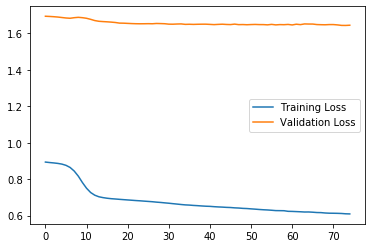

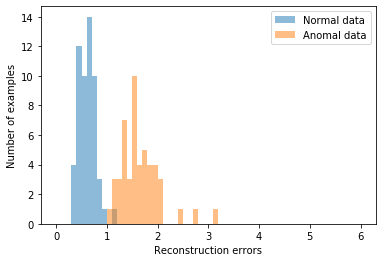

Best threshold: 1.0939597315436242


In [23]:
compare_subjects(ivan.drop("subject",axis=1),luka.drop("subject",axis=1))

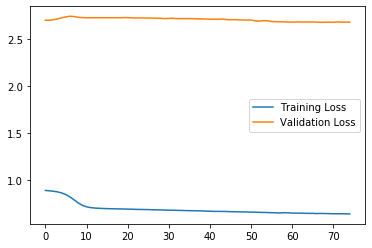

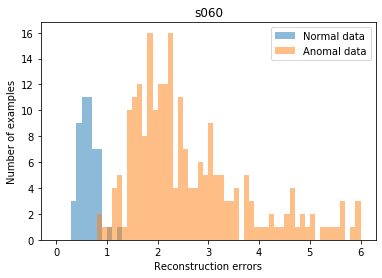

Accuracy = 0.979933110367893
Specificity(True negative rate) = 0.9799196787148594
Recall(True positive rate) = 0.98
Best threshold: 1.104026845637584
INFO:tensorflow:Assets written to: subjects\s060\autoencoder\assets


In [49]:
import os
import pickle

class Subject():
    def __init__(self, name, autoencoder=None, best_threshold=0, scaler=None):
        self.name = name
        self.autoencoder = autoencoder
        self.best_threshold = best_threshold
        self.scaler = scaler
        
    def save_subject(self):
        path = os.path.join("subjects",self.name)
        if not os.path.exists(path):
            os.makedirs(path)
        pickle.dump(self.scaler, open(os.path.join(path,"scaler.pickle"),"wb"))
        pickle.dump(self.best_threshold, open(os.path.join(path,"best_threshold.pickle"),"wb"))
        # scaler = load(open('scaler.pickle', 'rb'))
        self.autoencoder.save(os.path.join(path,"autoencoder"))
        #autoencoder = tf.keras.models.load_model("autoencoder") 
        
    def load_subject(self):
        path = os.path.join("subjects",self.name)
        if not os.path.exists(path):
            msg = f"Subject with name \"{self.name}\" does not exist"
            raise NameError(msg)
        self.scaler = pickle.load(open(os.path.join(path,"scaler.pickle"), 'rb'))
        self.best_threshold = pickle.load(open(os.path.join(path,"best_threshold.pickle"), 'rb'))
        self.autoencoder = tf.keras.models.load_model(os.path.join(path,"autoencoder"))
        
        
def train_subject(subject, dataset, train_samples=50, anomal_samples=250, display=False):
    
    NORMAL_TEST_LEN = 50
    PERCENTAGE = anomal_samples / dataset.shape[0]
    
    ss = StandardScaler()

    # Data for training the encoder
    normal_data = dataset.loc[dataset["subject"]==subject].sample(train_samples,random_state=42).drop("subject",axis=1)
    normal_scaled_data = ss.fit_transform(normal_data)
 
    #normal_test_data = dataset.loc[dataset["subject"]==subject].drop(normal_data.index).drop("subject",axis=1).sample(NORMAL_TEST_LEN,random_state=42)

    # Stratified Sampling of 500 anomalies from dataset (10 from each class)
    sss = StratifiedShuffleSplit(n_splits=1, test_size=PERCENTAGE,random_state=42)
    generator = sss.split(dataset,dataset["subject"])
    _, indices = next(generator)
    anomal_test_data = dataset.iloc[indices]
    anomal_test_data = anomal_test_data[anomal_test_data["subject"]!=subject].drop("subject",axis=1)
    anomal_len = anomal_test_data.shape[0]
    
    # Scaling
    anomal_test_scaled_data = ss.transform(anomal_test_data)
    normal_test_scaled_data = ss.transform(normal_data)

    test_data = pd.concat([normal_data,anomal_test_data],axis=0)
    test_data_scaled = ss.transform(test_data)
    test_data_labels = np.array([True] * train_samples + [False] * anomal_len)
    
    autoencoder, history = train_autoencoder(normal_scaled_data, test_data_scaled, epochs=75,batch_size=16)
    
    normal_loss = calculate_rec_loss(autoencoder,normal_test_scaled_data)
    anomal_loss = calculate_rec_loss(autoencoder,anomal_test_scaled_data)

    best_threshold = find_threshold(normal_loss,anomal_loss)
    
    preds = predict(autoencoder,test_data_scaled,best_threshold)
    acc,spec,recall = calculate_stats(preds,test_data_labels)
    
    if display:
        show_history(history)
        show_distributions(normal_loss, anomal_loss, title=subject)

        print("Accuracy = {}".format(acc))
        print("Specificity(True negative rate) = {}".format(spec))
        print("Recall(True positive rate) = {}".format(recall))

        print("Best threshold:",best_threshold)
    
    subject = Subject(subject,autoencoder,best_threshold,ss)
    subject.save_subject()
    
    return subject
    
train_subject("s060",extended_dataset,50,250,display=True)

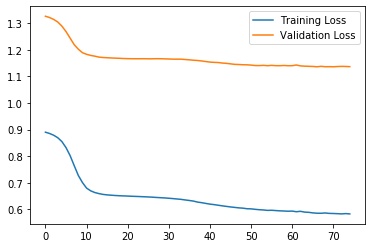

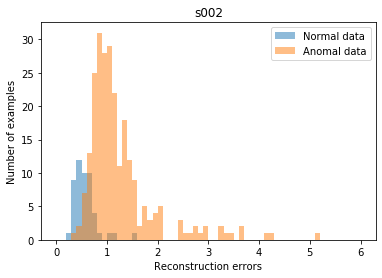

Accuracy = 0.8513513513513513
Specificity(True negative rate) = 0.8495934959349594
Recall(True positive rate) = 0.86
Best threshold: 0.761744966442953
INFO:tensorflow:Assets written to: subjects\s002\autoencoder\assets


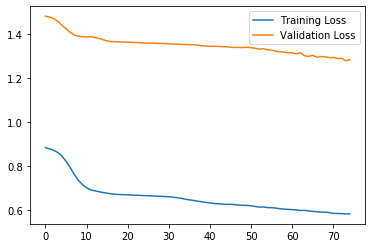

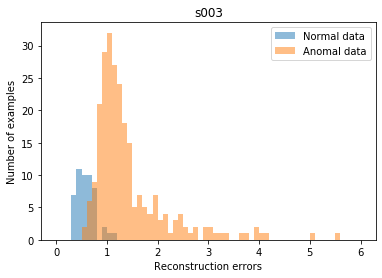

Accuracy = 0.9155405405405406
Specificity(True negative rate) = 0.9146341463414634
Recall(True positive rate) = 0.92
Best threshold: 0.8120805369127517
INFO:tensorflow:Assets written to: subjects\s003\autoencoder\assets


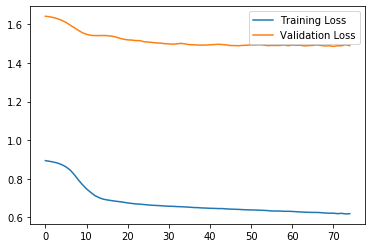

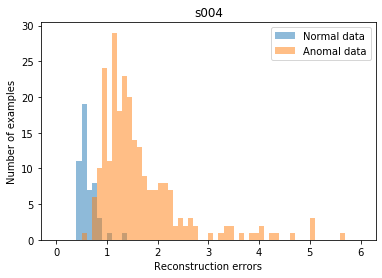

Accuracy = 0.956081081081081
Specificity(True negative rate) = 0.9552845528455285
Recall(True positive rate) = 0.96
Best threshold: 0.832214765100671
INFO:tensorflow:Assets written to: subjects\s004\autoencoder\assets


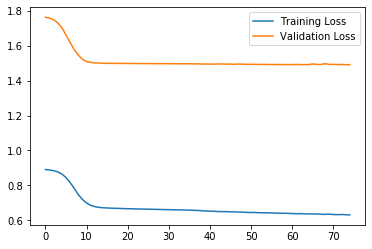

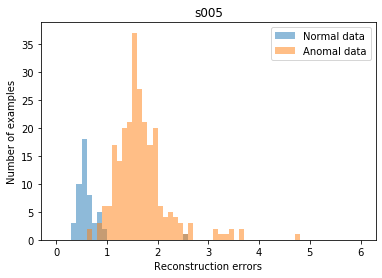

Accuracy = 0.9662162162162162
Specificity(True negative rate) = 0.967479674796748
Recall(True positive rate) = 0.96
Best threshold: 0.9832214765100671
INFO:tensorflow:Assets written to: subjects\s005\autoencoder\assets


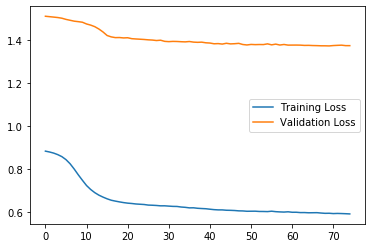

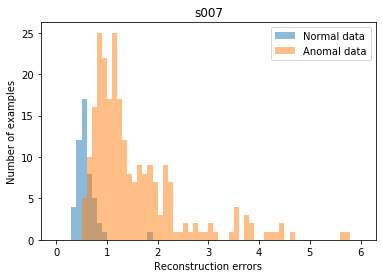

Accuracy = 0.8986486486486487
Specificity(True negative rate) = 0.8983739837398373
Recall(True positive rate) = 0.9
Best threshold: 0.761744966442953
INFO:tensorflow:Assets written to: subjects\s007\autoencoder\assets


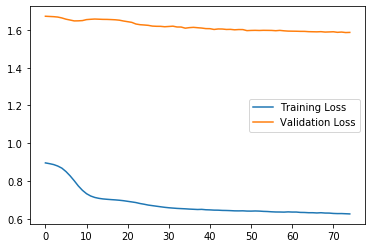

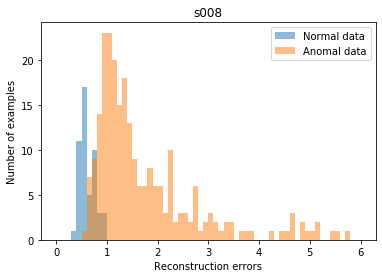

Accuracy = 0.918918918918919
Specificity(True negative rate) = 0.9186991869918699
Recall(True positive rate) = 0.92
Best threshold: 0.8221476510067114
INFO:tensorflow:Assets written to: subjects\s008\autoencoder\assets


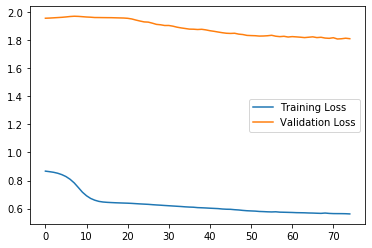

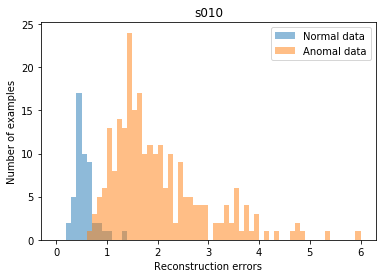

Accuracy = 0.9594594594594594
Specificity(True negative rate) = 0.959349593495935
Recall(True positive rate) = 0.96
Best threshold: 0.9328859060402684
INFO:tensorflow:Assets written to: subjects\s010\autoencoder\assets


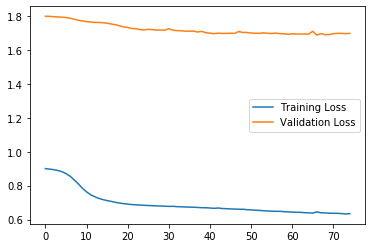

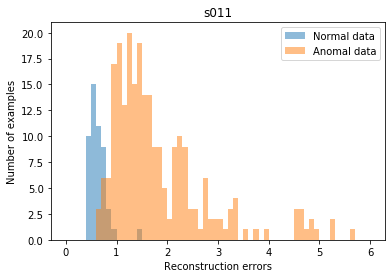

Accuracy = 0.956081081081081
Specificity(True negative rate) = 0.9552845528455285
Recall(True positive rate) = 0.96
Best threshold: 0.87248322147651
INFO:tensorflow:Assets written to: subjects\s011\autoencoder\assets


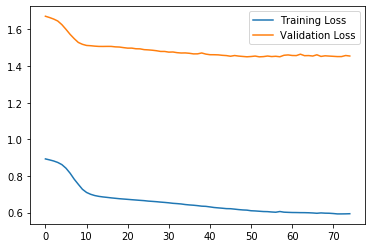

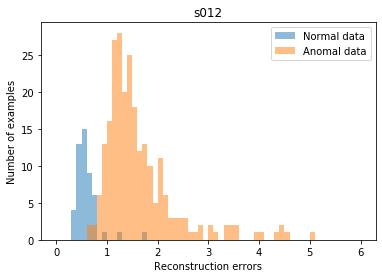

Accuracy = 0.9459459459459459
Specificity(True negative rate) = 0.9471544715447154
Recall(True positive rate) = 0.94
Best threshold: 0.9328859060402684
INFO:tensorflow:Assets written to: subjects\s012\autoencoder\assets


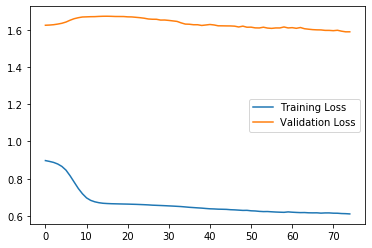

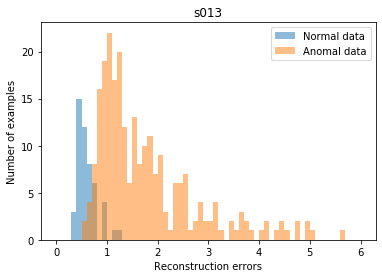

Accuracy = 0.8783783783783784
Specificity(True negative rate) = 0.8780487804878049
Recall(True positive rate) = 0.88
Best threshold: 0.8926174496644295
INFO:tensorflow:Assets written to: subjects\s013\autoencoder\assets


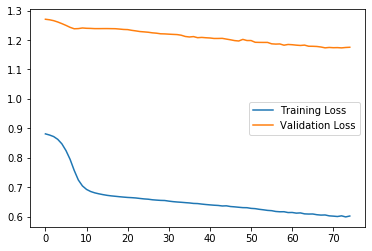

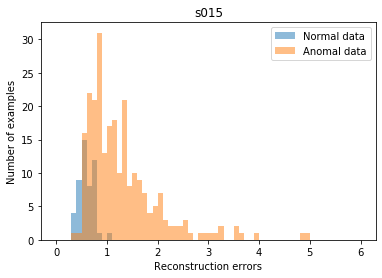

Accuracy = 0.8108108108108109
Specificity(True negative rate) = 0.8089430894308943
Recall(True positive rate) = 0.82
Best threshold: 0.7315436241610738
INFO:tensorflow:Assets written to: subjects\s015\autoencoder\assets


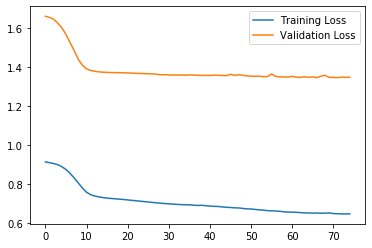

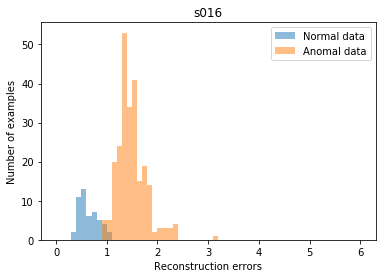

Accuracy = 0.9628378378378378
Specificity(True negative rate) = 0.9634146341463414
Recall(True positive rate) = 0.96
Best threshold: 1.0436241610738255
INFO:tensorflow:Assets written to: subjects\s016\autoencoder\assets


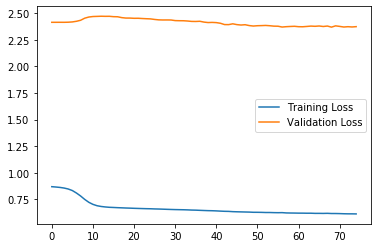

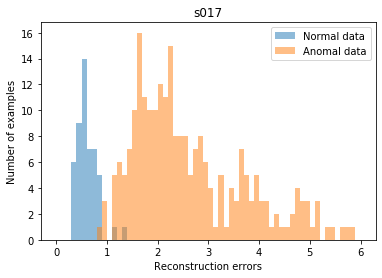

Accuracy = 0.9831649831649831
Specificity(True negative rate) = 0.9838056680161943
Recall(True positive rate) = 0.98
Best threshold: 1.134228187919463
INFO:tensorflow:Assets written to: subjects\s017\autoencoder\assets


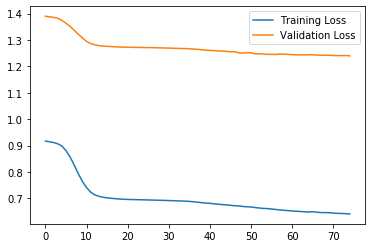

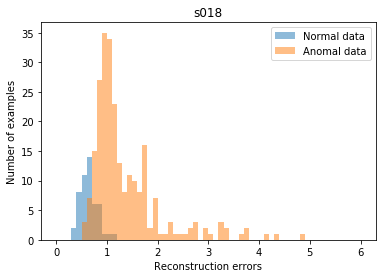

Accuracy = 0.8547297297297297
Specificity(True negative rate) = 0.8536585365853658
Recall(True positive rate) = 0.86
Best threshold: 0.8523489932885906
INFO:tensorflow:Assets written to: subjects\s018\autoencoder\assets


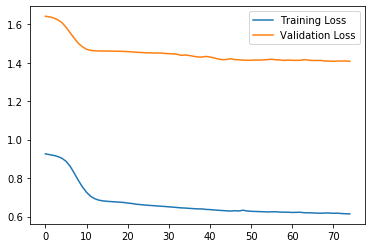

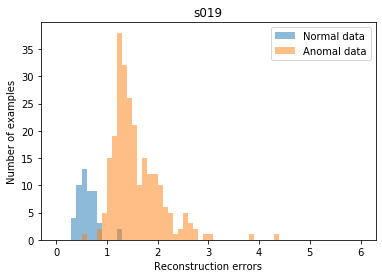

Accuracy = 0.9594594594594594
Specificity(True negative rate) = 0.959349593495935
Recall(True positive rate) = 0.96
Best threshold: 1.0134228187919463
INFO:tensorflow:Assets written to: subjects\s019\autoencoder\assets


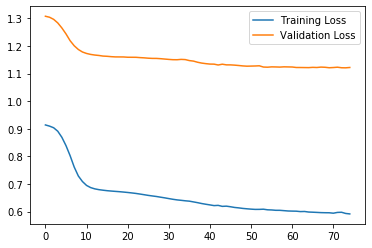

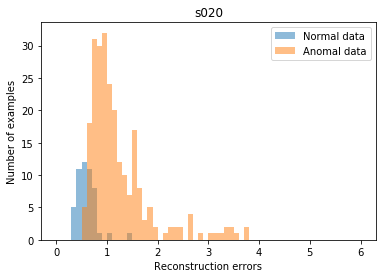

Accuracy = 0.8547297297297297
Specificity(True negative rate) = 0.8577235772357723
Recall(True positive rate) = 0.84
Best threshold: 0.7516778523489933
INFO:tensorflow:Assets written to: subjects\s020\autoencoder\assets


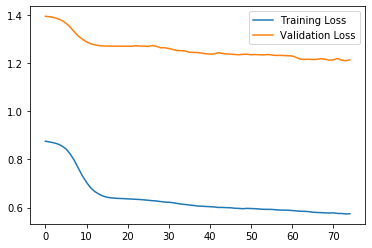

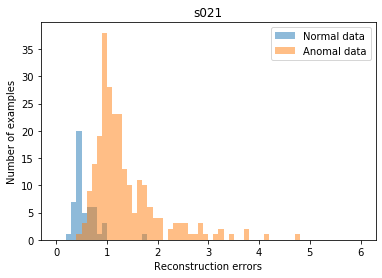

Accuracy = 0.8952702702702703
Specificity(True negative rate) = 0.8943089430894309
Recall(True positive rate) = 0.9
Best threshold: 0.7919463087248322
INFO:tensorflow:Assets written to: subjects\s021\autoencoder\assets


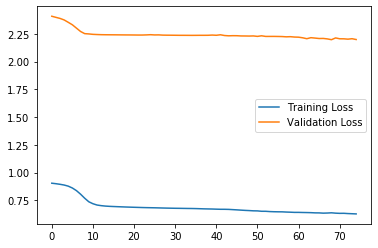

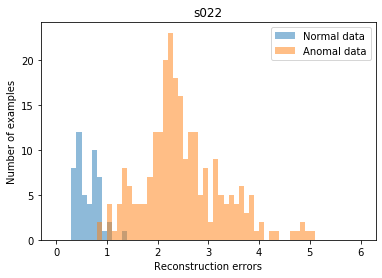

Accuracy = 0.9831081081081081
Specificity(True negative rate) = 0.983739837398374
Recall(True positive rate) = 0.98
Best threshold: 1.0838926174496644
INFO:tensorflow:Assets written to: subjects\s022\autoencoder\assets


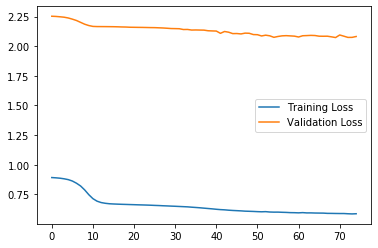

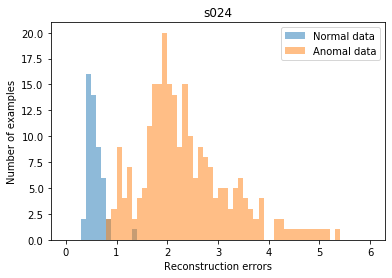

Accuracy = 0.9763513513513513
Specificity(True negative rate) = 0.975609756097561
Recall(True positive rate) = 0.98
Best threshold: 1.0033557046979866
INFO:tensorflow:Assets written to: subjects\s024\autoencoder\assets


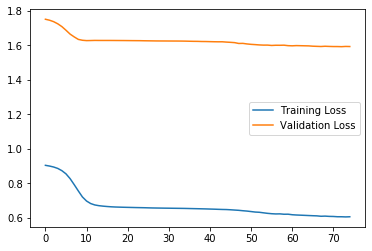

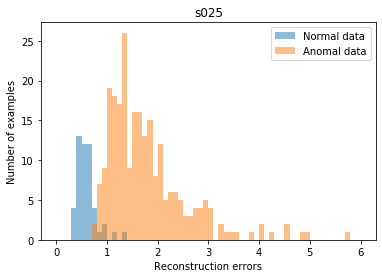

Accuracy = 0.9391891891891891
Specificity(True negative rate) = 0.9390243902439024
Recall(True positive rate) = 0.94
Best threshold: 0.9429530201342282
INFO:tensorflow:Assets written to: subjects\s025\autoencoder\assets


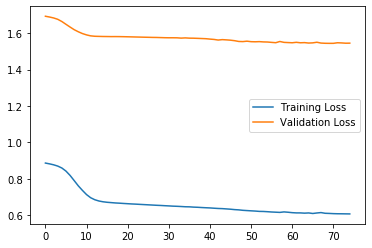

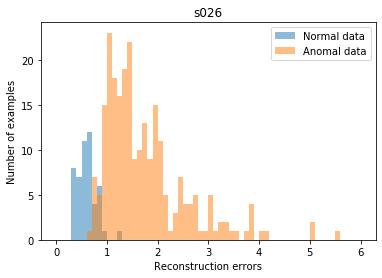

Accuracy = 0.9493243243243243
Specificity(True negative rate) = 0.9512195121951219
Recall(True positive rate) = 0.94
Best threshold: 0.8825503355704698
INFO:tensorflow:Assets written to: subjects\s026\autoencoder\assets


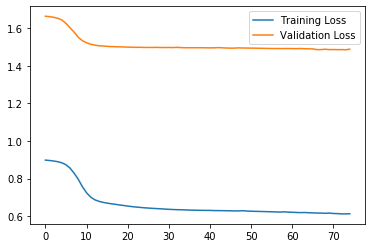

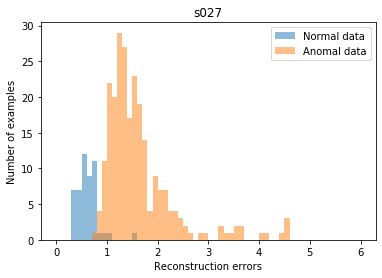

Accuracy = 0.9628378378378378
Specificity(True negative rate) = 0.9634146341463414
Recall(True positive rate) = 0.96
Best threshold: 0.9630872483221476
INFO:tensorflow:Assets written to: subjects\s027\autoencoder\assets


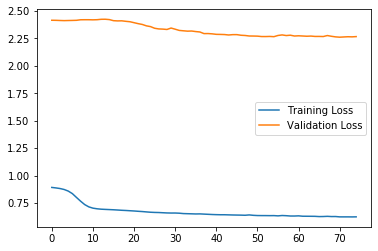

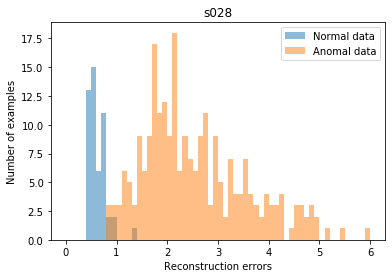

Accuracy = 0.9797297297297297
Specificity(True negative rate) = 0.9796747967479674
Recall(True positive rate) = 0.98
Best threshold: 0.9630872483221476
INFO:tensorflow:Assets written to: subjects\s028\autoencoder\assets


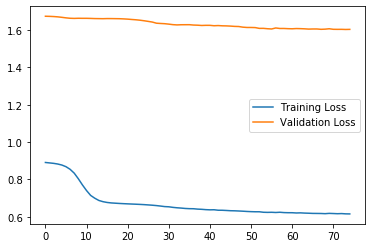

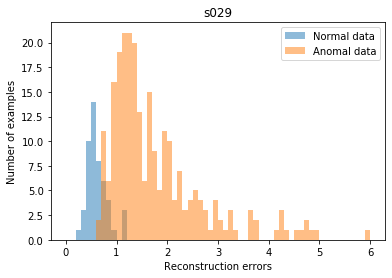

Accuracy = 0.918918918918919
Specificity(True negative rate) = 0.9186991869918699
Recall(True positive rate) = 0.92
Best threshold: 0.9026845637583892
INFO:tensorflow:Assets written to: subjects\s029\autoencoder\assets


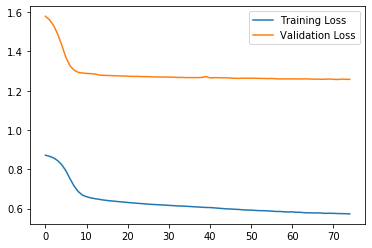

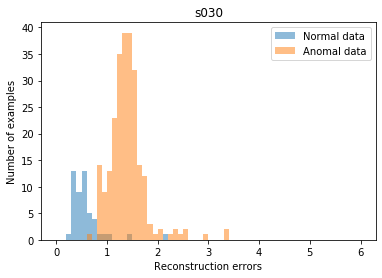

Accuracy = 0.9324324324324325
Specificity(True negative rate) = 0.9349593495934959
Recall(True positive rate) = 0.92
Best threshold: 0.912751677852349
INFO:tensorflow:Assets written to: subjects\s030\autoencoder\assets


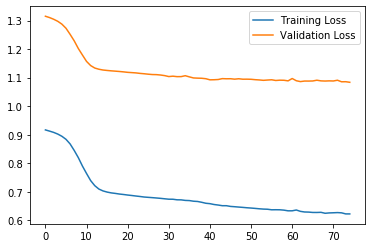

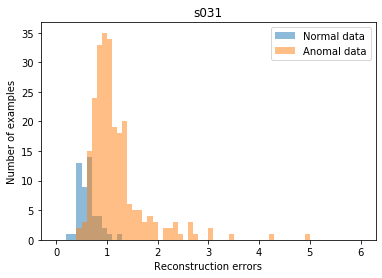

Accuracy = 0.831081081081081
Specificity(True negative rate) = 0.8333333333333334
Recall(True positive rate) = 0.82
Best threshold: 0.7919463087248322
INFO:tensorflow:Assets written to: subjects\s031\autoencoder\assets


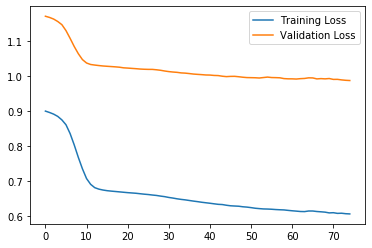

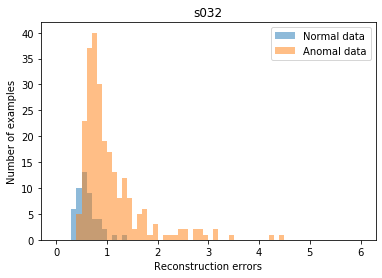

Accuracy = 0.7466216216216216
Specificity(True negative rate) = 0.7439024390243902
Recall(True positive rate) = 0.76
Best threshold: 0.6912751677852349
INFO:tensorflow:Assets written to: subjects\s032\autoencoder\assets


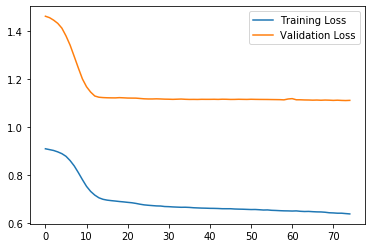

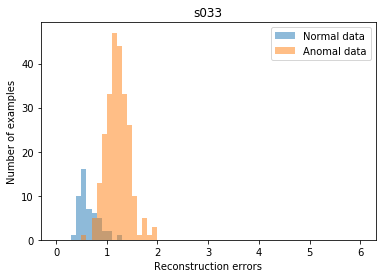

Accuracy = 0.902027027027027
Specificity(True negative rate) = 0.9024390243902439
Recall(True positive rate) = 0.9
Best threshold: 0.9228187919463087
INFO:tensorflow:Assets written to: subjects\s033\autoencoder\assets


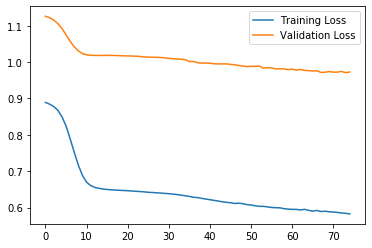

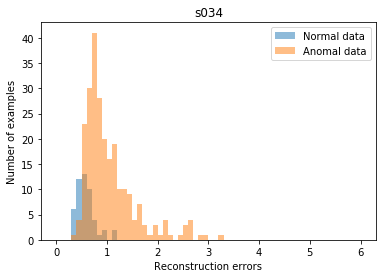

Accuracy = 0.7837837837837838
Specificity(True negative rate) = 0.7845528455284553
Recall(True positive rate) = 0.78
Best threshold: 0.6812080536912751
INFO:tensorflow:Assets written to: subjects\s034\autoencoder\assets


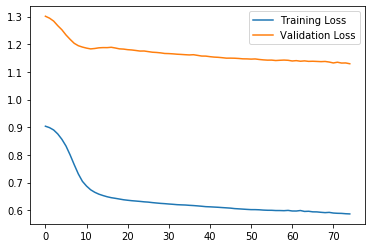

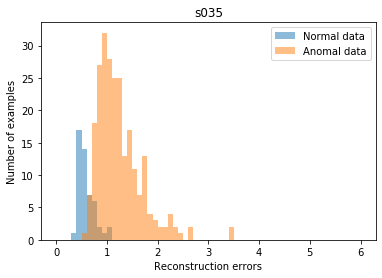

Accuracy = 0.8918918918918919
Specificity(True negative rate) = 0.8902439024390244
Recall(True positive rate) = 0.9
Best threshold: 0.802013422818792
INFO:tensorflow:Assets written to: subjects\s035\autoencoder\assets


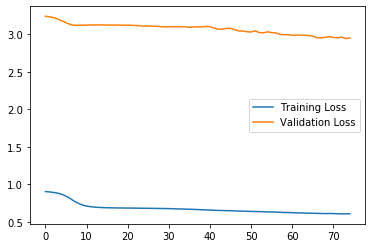

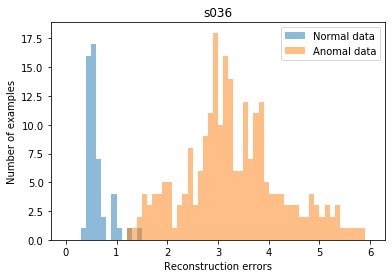

Accuracy = 0.9831081081081081
Specificity(True negative rate) = 0.983739837398374
Recall(True positive rate) = 0.98
Best threshold: 1.4563758389261743
INFO:tensorflow:Assets written to: subjects\s036\autoencoder\assets


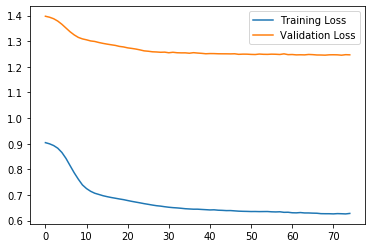

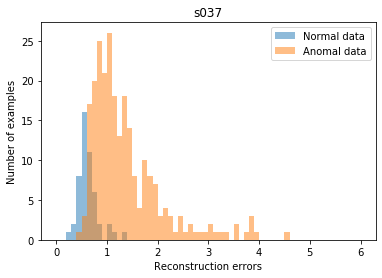

Accuracy = 0.8614864864864865
Specificity(True negative rate) = 0.8617886178861789
Recall(True positive rate) = 0.86
Best threshold: 0.7718120805369127
INFO:tensorflow:Assets written to: subjects\s037\autoencoder\assets


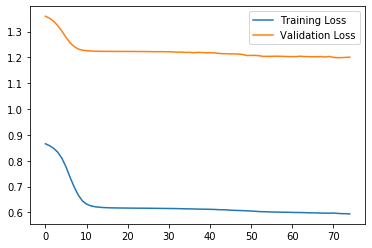

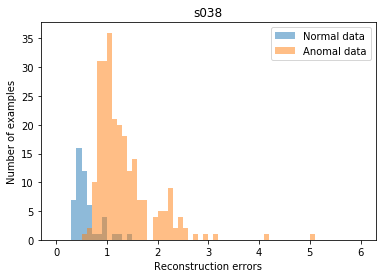

Accuracy = 0.8513513513513513
Specificity(True negative rate) = 0.8495934959349594
Recall(True positive rate) = 0.86
Best threshold: 0.8825503355704698
INFO:tensorflow:Assets written to: subjects\s038\autoencoder\assets


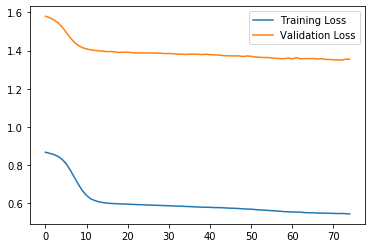

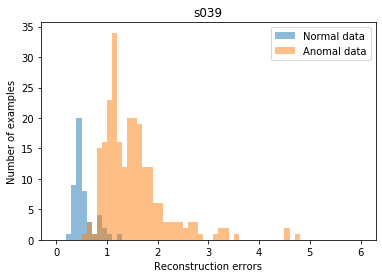

Accuracy = 0.918918918918919
Specificity(True negative rate) = 0.9186991869918699
Recall(True positive rate) = 0.92
Best threshold: 0.9026845637583892
INFO:tensorflow:Assets written to: subjects\s039\autoencoder\assets


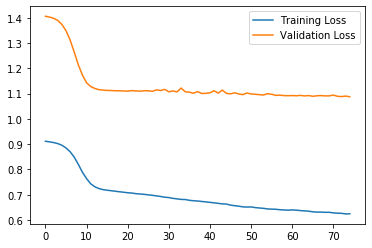

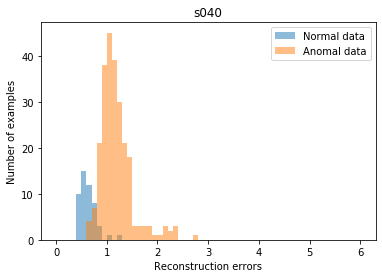

Accuracy = 0.9358108108108109
Specificity(True negative rate) = 0.9349593495934959
Recall(True positive rate) = 0.94
Best threshold: 0.8120805369127517
INFO:tensorflow:Assets written to: subjects\s040\autoencoder\assets


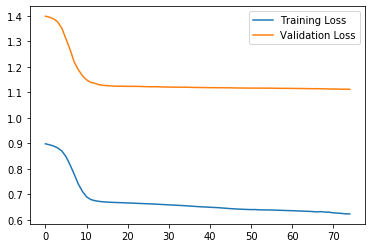

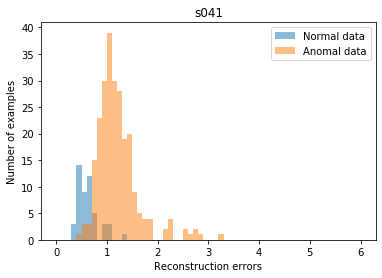

Accuracy = 0.8581081081081081
Specificity(True negative rate) = 0.8577235772357723
Recall(True positive rate) = 0.86
Best threshold: 0.8624161073825503
INFO:tensorflow:Assets written to: subjects\s041\autoencoder\assets


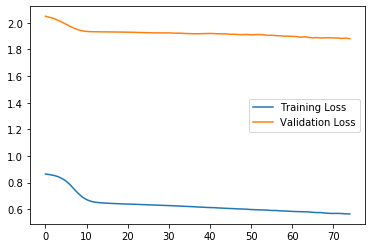

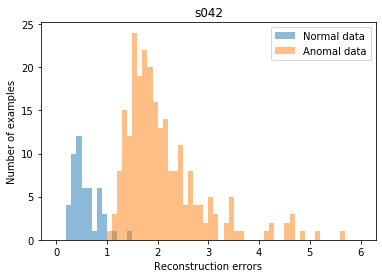

Accuracy = 0.9797297297297297
Specificity(True negative rate) = 0.9796747967479674
Recall(True positive rate) = 0.98
Best threshold: 1.2348993288590604
INFO:tensorflow:Assets written to: subjects\s042\autoencoder\assets


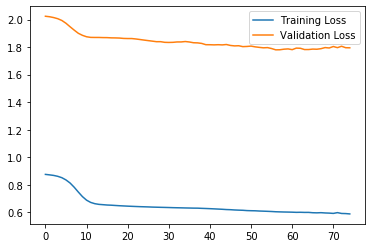

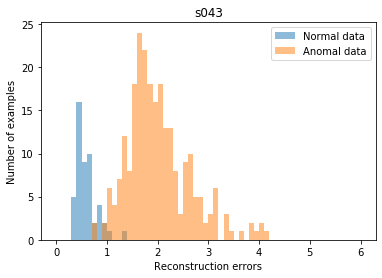

Accuracy = 0.9831081081081081
Specificity(True negative rate) = 0.983739837398374
Recall(True positive rate) = 0.98
Best threshold: 1.0134228187919463
INFO:tensorflow:Assets written to: subjects\s043\autoencoder\assets


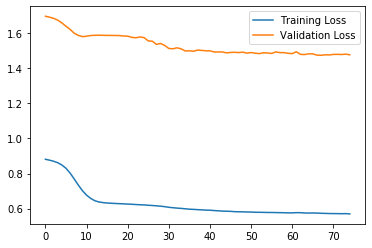

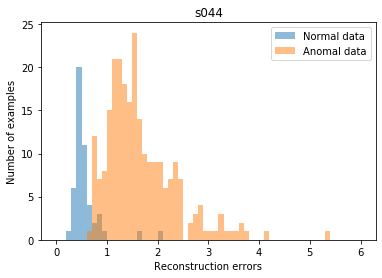

Accuracy = 0.9222972972972973
Specificity(True negative rate) = 0.9227642276422764
Recall(True positive rate) = 0.92
Best threshold: 0.8926174496644295
INFO:tensorflow:Assets written to: subjects\s044\autoencoder\assets


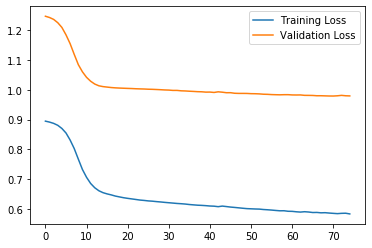

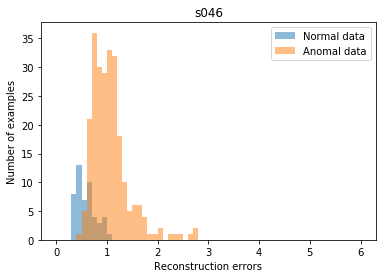

Accuracy = 0.8141891891891891
Specificity(True negative rate) = 0.8130081300813008
Recall(True positive rate) = 0.82
Best threshold: 0.7516778523489933
INFO:tensorflow:Assets written to: subjects\s046\autoencoder\assets


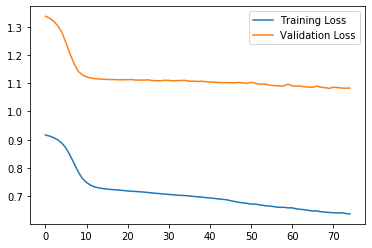

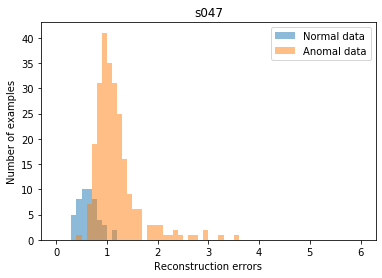

Accuracy = 0.8585858585858586
Specificity(True negative rate) = 0.8582995951417004
Recall(True positive rate) = 0.86
Best threshold: 0.8422818791946308
INFO:tensorflow:Assets written to: subjects\s047\autoencoder\assets


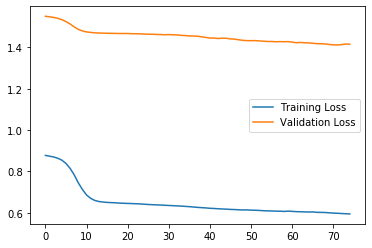

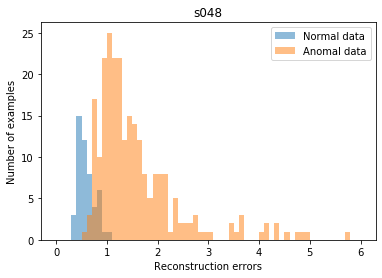

Accuracy = 0.8952702702702703
Specificity(True negative rate) = 0.8983739837398373
Recall(True positive rate) = 0.88
Best threshold: 0.8523489932885906
INFO:tensorflow:Assets written to: subjects\s048\autoencoder\assets


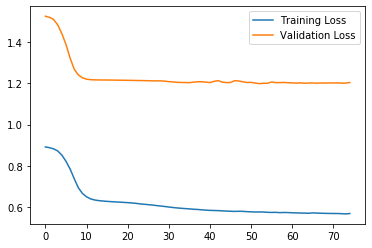

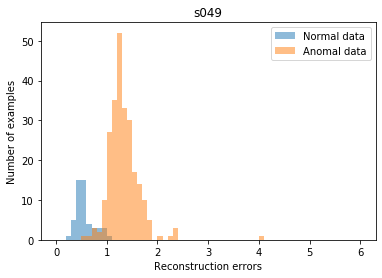

Accuracy = 0.9459459459459459
Specificity(True negative rate) = 0.943089430894309
Recall(True positive rate) = 0.96
Best threshold: 0.9630872483221476
INFO:tensorflow:Assets written to: subjects\s049\autoencoder\assets


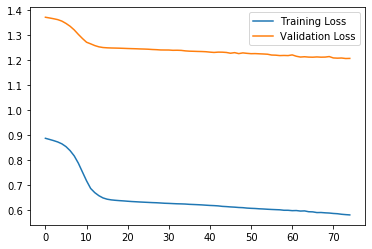

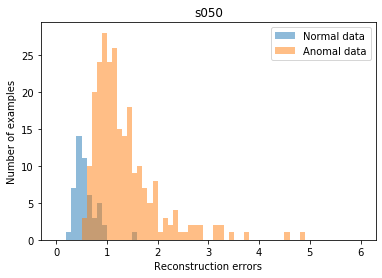

Accuracy = 0.8619528619528619
Specificity(True negative rate) = 0.8623481781376519
Recall(True positive rate) = 0.86
Best threshold: 0.802013422818792
INFO:tensorflow:Assets written to: subjects\s050\autoencoder\assets


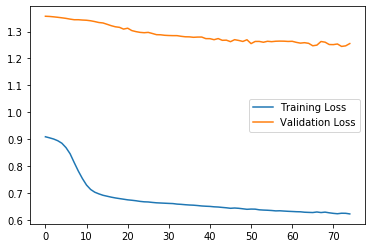

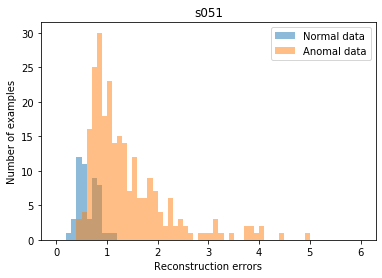

Accuracy = 0.793918918918919
Specificity(True negative rate) = 0.7926829268292683
Recall(True positive rate) = 0.8
Best threshold: 0.8120805369127517
INFO:tensorflow:Assets written to: subjects\s051\autoencoder\assets


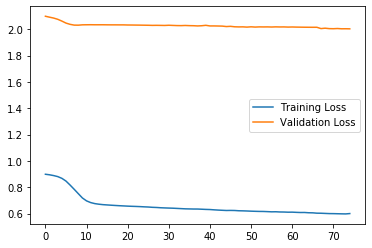

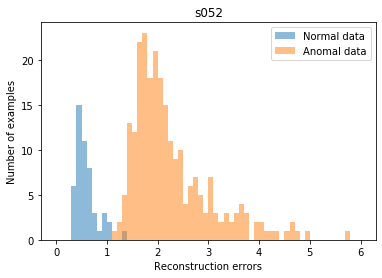

Accuracy = 0.9831081081081081
Specificity(True negative rate) = 0.983739837398374
Recall(True positive rate) = 0.98
Best threshold: 1.325503355704698
INFO:tensorflow:Assets written to: subjects\s052\autoencoder\assets


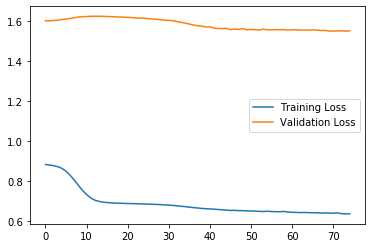

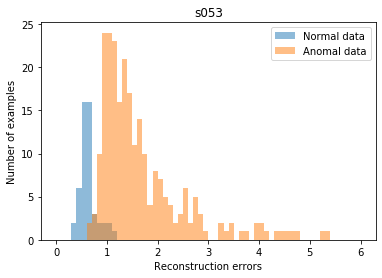

Accuracy = 0.9259259259259259
Specificity(True negative rate) = 0.9271255060728745
Recall(True positive rate) = 0.92
Best threshold: 0.9228187919463087
INFO:tensorflow:Assets written to: subjects\s053\autoencoder\assets


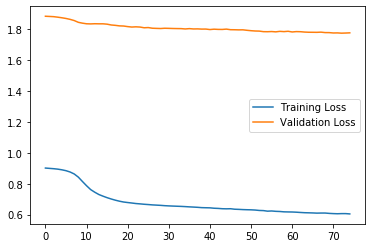

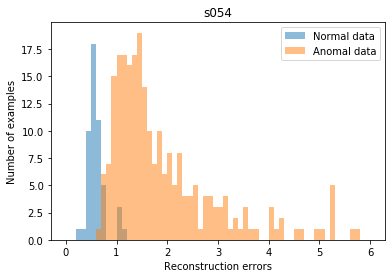

Accuracy = 0.918918918918919
Specificity(True negative rate) = 0.9186991869918699
Recall(True positive rate) = 0.92
Best threshold: 0.9530201342281879
INFO:tensorflow:Assets written to: subjects\s054\autoencoder\assets


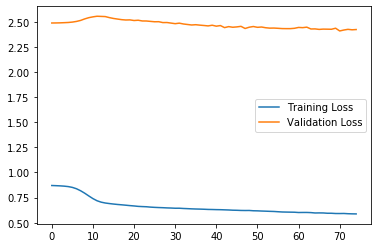

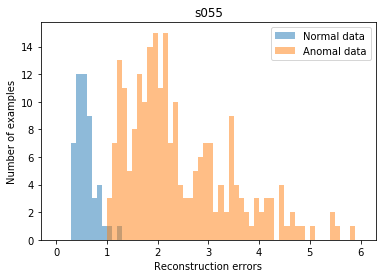

Accuracy = 0.9797297297297297
Specificity(True negative rate) = 0.9796747967479674
Recall(True positive rate) = 0.98
Best threshold: 1.134228187919463
INFO:tensorflow:Assets written to: subjects\s055\autoencoder\assets


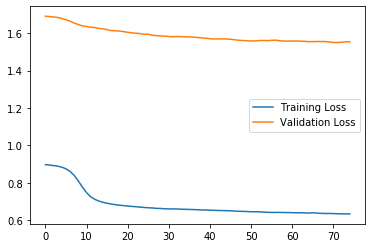

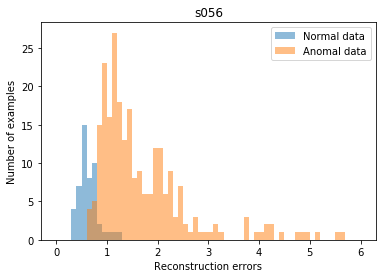

Accuracy = 0.9155405405405406
Specificity(True negative rate) = 0.9146341463414634
Recall(True positive rate) = 0.92
Best threshold: 0.8825503355704698
INFO:tensorflow:Assets written to: subjects\s056\autoencoder\assets


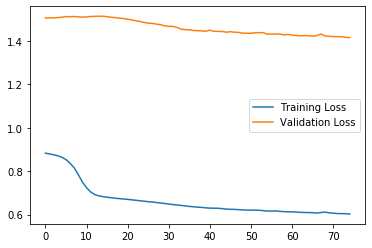

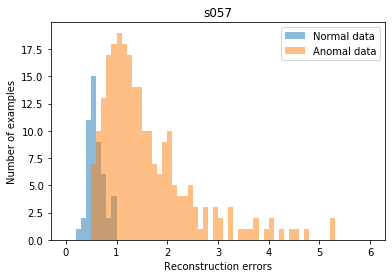

Accuracy = 0.8783783783783784
Specificity(True negative rate) = 0.8780487804878049
Recall(True positive rate) = 0.88
Best threshold: 0.802013422818792
INFO:tensorflow:Assets written to: subjects\s057\autoencoder\assets


In [31]:
subject_list = {}

def train(dataset):
    for subject in dataset["subject"].unique():
        sub_object = train_subject(subject,dataset,50,250,display=True)
        subject_list[subject] = sub_object

train(train_dataset)

In [32]:
test_dataset = pd.concat([y_test,X_test],axis=1)
test_dataset = test_dataset.reset_index(drop=True)
test_dataset

,subject,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,UD.i.e,H.e,DD.e.five,UD.e.five,H.five,DD.five.Shift.r,UD.five.Shift.r,H.Shift.r,DD.Shift.r.o,UD.Shift.r.o,H.o,DD.o.a,UD.o.a,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
0,s029,0.0956,0.1971,0.1015,0.0734,0.1296,0.0562,0.0541,0.0913,0.0372,0.0713,0.2420,0.1707,0.0763,0.3310,0.2547,0.0824,0.1632,0.0808,0.0758,0.1611,0.0853,0.0953,0.1146,0.0193,0.1009,0.0744,-0.0265,0.0978,0.2629,0.1651,0.0742
1,s041,0.2424,0.2998,0.0574,0.1343,0.2219,0.0876,0.1651,0.1675,0.0024,0.1066,0.2595,0.1529,0.1013,0.5317,0.4304,0.1744,0.2024,0.0280,0.1570,0.1528,-0.0042,0.1451,0.1945,0.0494,0.1477,0.2078,0.0601,0.1567,0.3090,0.1523,0.1329
2,s027,0.0884,1.2024,1.1140,0.0911,0.2595,0.1684,0.1365,0.1985,0.0620,0.1209,0.7463,0.6254,0.0855,0.6120,0.5265,0.1336,0.2591,0.1255,0.1322,0.0766,-0.0556,0.1148,0.2972,0.1824,0.1048,0.1972,0.0924,0.1127,0.3063,0.1936,0.1188
3,s028,0.0742,0.1625,0.0883,0.0544,0.1112,0.0568,0.0578,0.0758,0.0180,0.0591,0.3707,0.3116,0.0467,0.4009,0.3542,0.0605,0.3498,0.2893,0.0510,0.0880,0.0370,0.0718,0.0895,0.0177,0.0615,0.1671,0.1056,0.0631,0.2533,0.1902,0.0594
4,s017,0.0721,0.1958,0.1237,0.0510,0.1022,0.0512,0.0491,0.0937,0.0446,0.0668,0.2721,0.2053,0.0562,0.3835,0.3273,0.0573,0.1925,0.1352,0.0665,0.1020,0.0355,0.0634,0.0925,0.0291,0.0536,0.1497,0.0961,0.0655,0.1760,0.1105,0.0618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095,s043,0.0588,0.3630,0.3042,0.0704,0.2165,0.1461,0.0731,0.3004,0.2273,0.0834,0.3853,0.3019,0.0583,0.5358,0.4775,0.0467,0.4101,0.3634,0.0504,0.0824,0.0320,0.0900,0.2338,0.1438,0.0488,0.2706,0.2218,0.0602,0.2755,0.2153,0.0559
5096,s005,0.0810,0.3546,0.2736,0.0979,0.1913,0.0934,0.1095,0.2256,0.1161,0.1190,0.3375,0.2185,0.0853,0.6111,0.5258,0.1095,0.4170,0.3075,0.1301,0.1983,0.0682,0.1328,0.2210,0.0882,0.0483,0.2401,0.1918,0.0969,0.4512,0.3543,0.0797
5097,s011,0.0774,0.3172,0.2398,0.1188,0.1199,0.0011,0.0971,0.1768,0.0797,0.0913,0.1805,0.0892,0.1117,0.2870,0.1753,0.1157,0.1601,0.0444,0.0818,0.0911,0.0093,0.0985,0.0937,-0.0048,0.0907,0.0827,-0.0080,0.1162,0.1660,0.0498,0.0961
5098,s057,0.0681,0.0883,0.0202,0.0710,0.0966,0.0256,0.0678,0.0699,0.0021,0.1092,0.0567,-0.0525,0.0952,0.2232,0.1280,0.0676,0.1059,0.0383,0.0668,0.2096,0.1428,0.1153,0.0834,-0.0319,0.0895,0.1694,0.0799,0.0712,0.3551,0.2839,0.0976


In [34]:
def test_subject(subject, dataset):
    y_test = dataset["subject"] == subject.name
    x_test = dataset.drop("subject",axis=1)
    x_test_scaled = subject.scaler.transform(x_test)
    preds = predict(subject.autoencoder,x_test_scaled,subject.best_threshold)
    acc,spec,recall = calculate_stats(preds,y_test)
    print("Accuracy = {}".format(acc))
    print("Specificity(True negative rate) = {}".format(spec))
    print("Recall(True positive rate) = {}".format(recall))
    return acc,spec,recall
    
def test(dataset, subject_list):
    acc_list=[]
    spec_list=[]
    recall_list=[]
    for subject in dataset["subject"].unique():
        print("------------------")
        print("Subject:",subject)
        print("------------------")
        acc,spec,recall = test_subject(subject_list[subject],dataset)
        acc_list.append(acc)
        spec_list.append(spec)
        recall_list.append(recall)
    print("------------------")
    print("AVERAGE RESULTS")
    print("------------------")
    print("Accuracy = {}".format(np.array(acc_list).mean()))
    print("Specificity(True negative rate) = {}".format(np.array(spec_list).mean()))
    print("Recall(True positive rate) = {}".format(np.array(recall_list).mean()))

In [35]:
test(test_dataset, subject_list)

------------------
Subject: s029
------------------
Accuracy = 0.9241176470588235
Specificity(True negative rate) = 0.9256
Recall(True positive rate) = 0.85
------------------
Subject: s041
------------------
Accuracy = 0.8750980392156863
Specificity(True negative rate) = 0.8754
Recall(True positive rate) = 0.86
------------------
Subject: s027
------------------
Accuracy = 0.9531372549019608
Specificity(True negative rate) = 0.9542
Recall(True positive rate) = 0.9
------------------
Subject: s028
------------------
Accuracy = 0.9762745098039216
Specificity(True negative rate) = 0.9798
Recall(True positive rate) = 0.8
------------------
Subject: s017
------------------
Accuracy = 0.9643137254901961
Specificity(True negative rate) = 0.9648
Recall(True positive rate) = 0.94
------------------
Subject: s048
------------------
Accuracy = 0.9084313725490196
Specificity(True negative rate) = 0.91
Recall(True positive rate) = 0.83
------------------
Subject: s026
------------------
Accuracy =

AVERAGE RESULTS
------------------
## 250 for training, 250 for best threshold (same instances)
    Accuracy = 0.9039484813533256
    Specificity(True negative rate) = 0.904835294117647
    Recall(True positive rate) = 0.8596078431372548
## 50 for training, 250 for best threshold - StandardScaler
    Accuracy = 0.8760553633217993
    Specificity(True negative rate) = 0.876278431372549
    Recall(True positive rate) = 0.8649019607843137
## 20 for training, 250 for best threshold
    Accuracy = 0.8783852364475202
    Specificity(True negative rate) = 0.878643137254902
    Recall(True positive rate) = 0.8654901960784314
## 50 for training, 50 for best threshold (same instances)
    Accuracy = 0.9285121107266437
    Specificity(True negative rate) = 0.9316745098039215
    Recall(True positive rate) = 0.770392156862745
## 50 for training, 50 for best threshold (different instances)
    Accuracy = 0.8971357170319108
    Specificity(True negative rate) = 0.8989607843137255
    Recall(True positive rate) = 0.8058823529411764

In [37]:
test_subject = Subject("s005")
test_subject.load_subject()
test_df = test_dataset.loc[test_dataset["subject"]=="s005"]
scaled_dataframe = test_subject.scaler.transform(test_df.drop("subject",axis=1))
prediction = predict(
    test_subject.autoencoder,
    scaled_dataframe,
    test_subject.best_threshold
)
print(f"\n-----> {prediction}\n")


-----> [ True  True  True  True  True  True False  True  True  True False  True  True False  True  True  True  True  True False  True  True  True  True
 False  True  True  True  True  True  True  True  True  True  True  True  True  True  True False  True  True  True  True  True  True  True  True
  True  True  True False  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True  True  True  True  True False  True  True  True  True  True  True False
  True False  True  True]



In [40]:
test_subject = Subject("s060")
test_subject.load_subject()
test_df = extended_dataset.loc[extended_dataset["subject"]=="s060"]
scaled_dataframe = test_subject.scaler.transform(test_df.drop("subject",axis=1))
prediction = predict(
    test_subject.autoencoder,
    scaled_dataframe,
    test_subject.best_threshold
)
print(f"\n-----> {prediction}\n")


-----> [ True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]



In [41]:
extended_dataset.loc[extended_dataset["subject"]=="s060"]

,DD.Shift.r.o,DD.a.n,DD.e.five,DD.five.Shift.r,DD.i.e,DD.l.Return,DD.n.l,DD.o.a,DD.period.t,DD.t.i,H.Return,H.Shift.r,H.a,H.e,H.five,H.i,H.l,H.n,H.o,H.period,H.t,UD.Shift.r.o,UD.a.n,UD.e.five,UD.five.Shift.r,UD.i.e,UD.l.Return,UD.n.l,UD.o.a,UD.period.t,UD.t.i,subject
50,0.106952,0.098020,0.167793,0.225070,0.085015,0.190000,0.196702,0.104175,0.126634,0.119639,0.119894,0.105950,0.098020,0.090713,0.078094,0.085015,0.098991,0.077886,0.090219,0.098083,0.091033,0.001002,0.000000,0.077080,0.146975,0.000000,0.091009,0.118816,0.013956,0.028551,0.028606,s060
51,0.105210,0.098191,0.182877,0.232229,0.104776,0.162138,0.182797,0.105574,0.202767,0.099413,0.126054,0.118759,0.112229,0.084963,0.070491,0.090662,0.091352,0.084465,0.091580,0.104958,0.099413,-0.013549,-0.014038,0.097913,0.161739,0.014115,0.070786,0.098332,0.013994,0.097809,0.000000,s060
52,0.106182,0.083938,0.210827,0.238944,0.084218,0.147902,0.189775,0.111979,0.139651,0.155127,0.126186,0.120192,0.104873,0.126647,0.083829,0.097266,0.106190,0.091424,0.090707,0.111642,0.099004,-0.014010,-0.020935,0.084181,0.155115,-0.013047,0.041711,0.098351,0.021273,0.028009,0.056123,s060
53,0.113322,0.106793,0.232509,0.259816,0.118550,0.223770,0.182156,0.104959,0.167952,0.106073,0.099237,0.113322,0.105791,0.120636,0.084837,0.091182,0.098045,0.090117,0.090882,0.104911,0.070326,0.000000,0.001002,0.111873,0.174979,0.027367,0.125725,0.092039,0.014077,0.063041,0.035747,s060
54,0.126780,0.105631,0.174829,0.204197,0.085696,0.197190,0.174975,0.098269,0.092115,0.160362,0.083839,0.140794,0.119670,0.111663,0.063860,0.085696,0.113146,0.083997,0.098269,0.076827,0.104747,-0.014014,-0.014039,0.063167,0.140337,0.000000,0.084044,0.090979,0.000000,0.015288,0.055615,s060
55,0.085090,0.098003,0.182359,0.288441,0.118867,0.141039,0.169309,0.111907,0.186688,0.113102,0.111689,0.085090,0.084358,0.105774,0.091588,0.076858,0.098692,0.085144,0.098110,0.116598,0.113102,0.000000,0.013645,0.076585,0.196854,0.042009,0.042347,0.084165,0.013797,0.070090,0.000000,s060
56,0.084358,0.098957,0.175962,0.224848,0.098016,0.160996,0.169086,0.104964,0.140265,0.105690,0.119956,0.112378,0.111992,0.083810,0.084039,0.083371,0.111973,0.083042,0.090847,0.091161,0.105690,-0.028020,-0.013035,0.092152,0.140808,0.014644,0.049023,0.086043,0.014117,0.049104,0.000000,s060
57,0.090875,0.106167,0.189498,0.231840,0.086011,0.132288,0.176366,0.112186,0.161427,0.112026,0.113318,0.104855,0.106167,0.104389,0.084079,0.085019,0.097426,0.077183,0.091126,0.105837,0.084019,-0.013980,0.000000,0.085109,0.147762,0.000992,0.034862,0.099183,0.021060,0.055590,0.028007,s060
58,0.113134,0.106889,0.181552,0.232209,0.085372,0.113320,0.187919,0.090922,0.133924,0.132699,0.154037,0.113134,0.105887,0.111627,0.078246,0.085372,0.099023,0.075922,0.090922,0.104605,0.104910,0.000000,0.001003,0.069925,0.153963,0.000000,0.014297,0.111997,0.000000,0.029319,0.027789,s060
59,0.098329,0.091062,0.182833,0.217995,0.098031,0.125477,0.175574,0.105730,0.175781,0.113347,0.134859,0.119054,0.111290,0.097522,0.083833,0.098031,0.098141,0.090943,0.105730,0.134187,0.113347,-0.020725,-0.020229,0.085311,0.134162,0.000000,0.027336,0.084631,0.000000,0.041595,0.000000,s060


In [43]:
train_dataset

,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,UD.i.e,H.e,DD.e.five,UD.e.five,H.five,DD.five.Shift.r,UD.five.Shift.r,H.Shift.r,DD.Shift.r.o,UD.Shift.r.o,H.o,DD.o.a,UD.o.a,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return,subject
0,0.1399,0.2728,0.1329,0.1354,0.1893,0.0539,0.0958,0.1051,0.0093,0.1024,0.4858,0.3834,0.1016,0.4714,0.3698,0.1402,0.2358,0.0956,0.1148,0.1236,0.0088,0.1473,0.1917,0.0444,0.1061,0.2747,0.1686,0.1188,0.2739,0.1551,0.1053,s002
1,0.1169,0.2562,0.1393,0.0739,0.1549,0.0810,0.0892,0.1462,0.0570,0.0966,1.3501,1.2535,0.0826,1.0669,0.9843,0.1291,0.6546,0.5255,0.1317,0.2112,0.0795,0.1434,0.1083,-0.0351,0.0869,0.2072,0.1203,0.1027,1.1307,1.0280,0.1301,s002
2,0.1502,0.2114,0.0612,0.0650,0.1302,0.0652,0.0985,0.1249,0.0264,0.0908,0.2380,0.1472,0.1080,0.5008,0.3928,0.1003,0.2112,0.1109,0.1217,0.1379,0.0162,0.1212,0.1587,0.0375,0.0845,0.1990,0.1145,0.1061,0.2971,0.1910,0.1014,s002
3,0.0855,0.1796,0.0941,0.0731,0.0829,0.0098,0.0808,0.1682,0.0874,0.0715,0.6499,0.5784,0.0898,0.4343,0.3445,0.1024,0.1887,0.0863,0.0861,0.1408,0.0547,0.0882,0.0687,-0.0195,0.0673,0.2549,0.1876,0.0816,0.3451,0.2635,0.0763,s002
4,0.1061,0.2712,0.1651,0.1024,0.1708,0.0684,0.0781,0.1462,0.0681,0.0805,0.3874,0.3069,0.0763,0.4039,0.3276,0.1017,0.1387,0.0370,0.0813,0.2184,0.1371,0.1558,0.0051,-0.1507,0.0792,0.2423,0.1631,0.0953,0.2034,0.1081,0.0810,s002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15295,0.0876,0.2587,0.1711,0.0647,0.0607,-0.0040,0.1071,0.1042,-0.0029,0.0512,0.2113,0.1601,0.0815,0.3698,0.2883,0.0686,0.1375,0.0689,0.0781,0.0793,0.0012,0.0868,0.3268,0.2400,0.0335,0.3188,0.2853,0.0900,0.2289,0.1389,0.1116,s057
15296,0.0770,0.1331,0.0561,0.0805,0.0869,0.0064,0.0878,0.1129,0.0251,0.0475,0.2295,0.1820,0.0681,0.3101,0.2420,0.0663,0.2322,0.1659,0.0686,0.1868,0.1182,0.0747,0.0851,0.0104,0.0530,0.1849,0.1319,0.1034,0.2462,0.1428,0.1184,s057
15297,0.0871,0.1203,0.0332,0.0918,0.1232,0.0314,0.0723,0.0758,0.0035,0.0515,0.5177,0.4662,0.1016,0.6117,0.5101,0.0554,0.1551,0.0997,0.0797,0.1154,0.0357,0.0728,0.1024,0.0296,0.0588,0.1711,0.1123,0.1079,0.2389,0.1310,0.1234,s057
15298,0.0855,0.1693,0.0838,0.0834,0.0789,-0.0045,0.0786,0.1190,0.0404,0.0549,0.4940,0.4391,0.0517,0.2309,0.1792,0.0668,0.1386,0.0718,0.0823,0.1212,0.0389,0.0639,0.1684,0.1045,0.0541,0.2590,0.2049,0.0897,0.3356,0.2459,0.1298,s057
